In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from Data_Preparation import *
from keras.utils import to_categorical

Using TensorFlow backend.


Data/Train/Single
0
Data/Train/GarbageForeground
1
Data/Train/Partial
2


In [2]:
X,y = create_training_data()

Data/Train/Single
0
Data/Train/GarbageForeground
1
Data/Train/Partial
2


In [4]:
#def binary_classification_model():
model = Sequential()

model.add(Conv2D(256,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

########NEW LAYERS BEING ADDED###################
model.add(Conv2D(128,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

################################################
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu")) # added a new activation layer

model.add(Dense(3))
model.add(Activation('softmax')) # chaging from sigmoid to softmax to include more classes

#filepath="weights.best.hdf5"
ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss ="categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
y_train=to_categorical(y, num_classes=3)

model.summary()
lr_model_history=model.fit(X,y_train,batch_size=10,epochs= 10,validation_split=0.1)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 256)       2560      
_________________________________________________________________
activation_5 (Activation)    (None, 50, 50, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 256)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       295040    
_________________________________________________________________
activation_6 (Activation)    (None, 25, 25, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 128)      

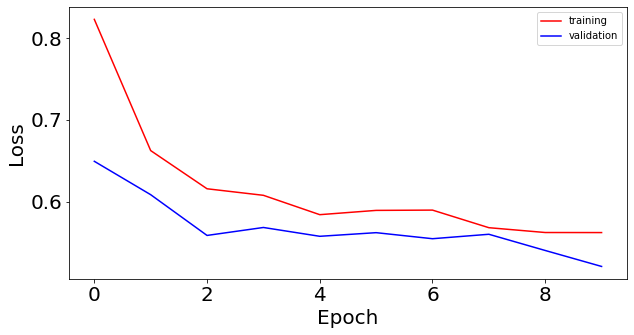

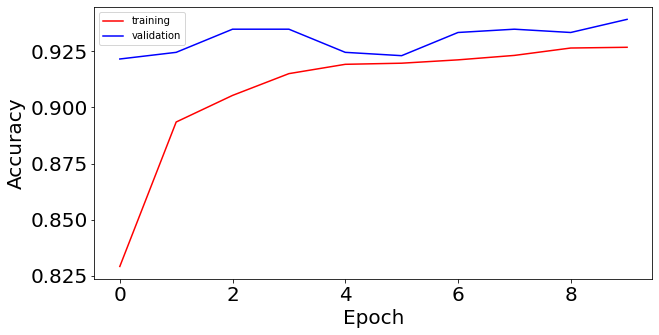

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='training')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='training')
ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
#import SimpleITK as sitk
#import os
#import glob
#reader = sitk.ImageFileReader()
#test_image_path = '/Users/keshavaprasad/Desktop/image/Classification_model/Data/Test/*'

In [6]:
img_size = 50 # fix the size of the image
Path = "Data/Test"
Testing_image = []# list of testing images
image_name = []# list of image names
try:
    for img in os.listdir(Path): #gives the images from the path
        img_array = cv2.imread(os.path.join(Path,img),cv2.IMREAD_GRAYSCALE) # read every image in gray scale from the given path
        Testing_image.append(img_array)
        image_name.append(img)
        #plt.imshow(img_array,cmap='gray')
        #plt.show()
        #break
except Exception as e:
    pass

In [61]:
#print(Testing_image[8])
#print(image_name[8])
#if '.DS_Store' in Testing_image:
#    Testing_image.index('.DS_Store')

#if image_name[8]== '.DS_Store':
#    print(Testing_image.pop(8))
#    print(image_name.pop(8))

In [7]:
print(len(Testing_image))
#print(Testing_image[8].shape)
#print(len(image_name))
#image_name

39140


In [8]:
Test_image = np.array(Testing_image).reshape(-1,img_size,img_size,1)#make an array of every element of list from Testing_image and then reshape them
#Test_image = Test_image/255.0

In [64]:
#print(Test_image[8].shape)
#print(Test_image[8])

In [9]:
scores = model.predict_classes(Test_image)
scores

array([2, 2, 2, ..., 2, 2, 2])

In [10]:
for i in range(len(Test_image)):
    #print("Image:",image_name[i],"with score:",scores[i]) 
    if scores[i]==0:
        print("Single Image:",image_name[i])
    if scores[i]==2:
        print("Partial Image:",image_name[i])

Partial Image: 3087.tif
Partial Image: 31610.tif
Partial Image: 21403.tif
Partial Image: 10806.tif
Partial Image: 38152.tif
Partial Image: 37261.tif
Partial Image: 18282.tif
Partial Image: 2399.tif
Partial Image: 28341.tif
Partial Image: 27072.tif
Partial Image: 4930.tif
Partial Image: 304.tif
Partial Image: 1690.tif
Partial Image: 33007.tif
Partial Image: 34768.tif
Partial Image: 23214.tif
Partial Image: 35476.tif
Partial Image: 1848.tif
Partial Image: 25665.tif
Partial Image: 32319.tif
Partial Image: 6841.tif
Partial Image: 25103.tif
Partial Image: 35310.tif
Partial Image: 7587.tif
Partial Image: 6699.tif
Partial Image: 12977.tif
Partial Image: 23572.tif
Partial Image: 33761.tif
Partial Image: 462.tif
Partial Image: 30268.tif
Partial Image: 28427.tif
Partial Image: 19822.tif
Partial Image: 27714.tif
Partial Image: 38634.tif
Partial Image: 3939.tif
Partial Image: 37507.tif
Partial Image: 5390.tif
Partial Image: 21365.tif
Partial Image: 36619.tif
Partial Image: 29739.tif
Partial Image:

Partial Image: 8501.tif
Partial Image: 7632.tif
Partial Image: 2992.tif
Partial Image: 18889.tif
Partial Image: 11113.tif
Partial Image: 3454.tif
Partial Image: 28792.tif
Partial Image: 5025.tif
Partial Image: 18651.tif
Partial Image: 26967.tif
Partial Image: 17562.tif
Partial Image: 38581.tif
Partial Image: 5743.tif
Partial Image: 18137.tif
Partial Image: 17204.tif
Partial Image: 11675.tif
Partial Image: 3332.tif
Partial Image: 19229.tif
Partial Image: 30863.tif
Partial Image: 15413.tif
Partial Image: 8267.tif
Partial Image: 24816.tif
Partial Image: 7154.tif
Partial Image: 1525.tif
Partial Image: 13062.tif
Partial Image: 9179.tif
Partial Image: 8273.tif
Partial Image: 15407.tif
Partial Image: 7140.tif
Partial Image: 24802.tif
Partial Image: 12368.tif
Partial Image: 1531.tif
Partial Image: 13076.tif
Partial Image: 14719.tif
Partial Image: 18123.tif
Partial Image: 5757.tif
Partial Image: 17210.tif
Partial Image: 2038.tif
Partial Image: 11661.tif
Partial Image: 3326.tif
Single Image: 444

Partial Image: 11489.tif
Partial Image: 36036.tif
Partial Image: 31981.tif
Partial Image: 20654.tif
Partial Image: 37328.tif
Partial Image: 28208.tif
Partial Image: 30447.tif
Partial Image: 10797.tif
Partial Image: 4879.tif
Partial Image: 24432.tif
Partial Image: 15837.tif
Partial Image: 34621.tif
Partial Image: 9385.tif
Partial Image: 1901.tif
Partial Image: 22043.tif
Partial Image: 12180.tif
Partial Image: 32250.tif
Partial Image: 6908.tif
Partial Image: 32536.tif
Partial Image: 35259.tif
Partial Image: 22725.tif
Partial Image: 15189.tif
Partial Image: 34147.tif
Partial Image: 14297.tif
Partial Image: 24354.tif
Partial Image: 33628.tif
Partial Image: 8925.tif
Partial Image: 30321.tif
Partial Image: 36988.tif
Partial Image: 20132.tif
Partial Image: 3870.tif
Partial Image: 16480.tif
Partial Image: 27885.tif
Partial Image: 36750.tif
Partial Image: 29670.tif
Partial Image: 17946.tif
Partial Image: 26543.tif
Partial Image: 25062.tif
Partial Image: 6920.tif
Partial Image: 35271.tif
Partial

Partial Image: 9795.tif
Partial Image: 32898.tif
Partial Image: 34231.tif
Partial Image: 24022.tif
Partial Image: 7960.tif
Partial Image: 33238.tif
Partial Image: 35891.tif
Partial Image: 24744.tif
Partial Image: 14687.tif
Partial Image: 34557.tif
Partial Image: 22335.tif
Partial Image: 15599.tif
Partial Image: 35649.tif
Partial Image: 32126.tif
Partial Image: 5811.tif
Partial Image: 26153.tif
Partial Image: 29260.tif
Partial Image: 36340.tif
Partial Image: 16090.tif
Partial Image: 39073.tif
Partial Image: 11927.tif
Partial Image: 20522.tif
Partial Image: 30731.tif
Partial Image: 1487.tif
Partial Image: 33210.tif
Partial Image: 23003.tif
Partial Image: 35661.tif
Partial Image: 25472.tif
Partial Image: 14877.tif
Partial Image: 29248.tif
Partial Image: 3290.tif
Partial Image: 31407.tif
Partial Image: 5839.tif
Partial Image: 21614.tif
Partial Image: 36368.tif
Partial Image: 38345.tif
Partial Image: 37076.tif
Partial Image: 18095.tif
Partial Image: 30719.tif
Partial Image: 28156.tif
Partia

Partial Image: 23015.tif
Partial Image: 1491.tif
Partial Image: 33206.tif
Partial Image: 2198.tif
Partial Image: 28140.tif
Partial Image: 27273.tif
Partial Image: 38353.tif
Partial Image: 11919.tif
Partial Image: 37060.tif
Partial Image: 18083.tif
Partial Image: 21602.tif
Partial Image: 3286.tif
Partial Image: 31411.tif
Partial Image: 29538.tif
Partial Image: 31377.tif
Partial Image: 21164.tif
Partial Image: 2826.tif
Partial Image: 36418.tif
Partial Image: 38435.tif
Partial Image: 37706.tif
Partial Image: 5191.tif
Partial Image: 30069.tif
Partial Image: 28626.tif
Partial Image: 16910.tif
Partial Image: 27515.tif
Partial Image: 663.tif
Partial Image: 33560.tif
Partial Image: 6498.tif
Partial Image: 23773.tif
Partial Image: 13868.tif
Partial Image: 35111.tif
Partial Image: 7786.tif
Partial Image: 25302.tif
Partial Image: 9973.tif
Partial Image: 26623.tif
Partial Image: 18915.tif
Partial Image: 29510.tif
Partial Image: 36430.tif
Partial Image: 20252.tif
Partial Image: 10391.tif
Partial Im

Partial Image: 15160.tif
Partial Image: 33819.tif
Partial Image: 7427.tif
Partial Image: 1056.tif
Partial Image: 22914.tif
Partial Image: 13511.tif
Partial Image: 6739.tif
Partial Image: 18444.tif
Partial Image: 5230.tif
Partial Image: 38794.tif
Partial Image: 17777.tif
Partial Image: 29841.tif
Partial Image: 3899.tif
Partial Image: 19982.tif
Partial Image: 36961.tif
Partial Image: 10018.tif
Partial Image: 28587.tif
Partial Image: 11306.tif
Partial Image: 29699.tif
Partial Image: 3641.tif
Partial Image: 16469.tif
Partial Image: 5224.tif
Partial Image: 18450.tif
Partial Image: 29855.tif
Partial Image: 17763.tif
Partial Image: 38780.tif
Partial Image: 36975.tif
Partial Image: 19996.tif
Partial Image: 28593.tif
Partial Image: 11312.tif
Partial Image: 3655.tif
Partial Image: 27878.tif
Partial Image: 15174.tif
Partial Image: 8700.tif
Single Image: 7433.tif
Partial Image: 22900.tif
Single Image: 1042.tif
Partial Image: 13505.tif
Partial Image: 9378.tif
Partial Image: 25909.tif
Partial Image:

Partial Image: 12356.tif
Partial Image: 32086.tif
Partial Image: 22295.tif
Partial Image: 15439.tif
Partial Image: 16130.tif
Partial Image: 30849.tif
Partial Image: 19203.tif
Partial Image: 4477.tif
Partial Image: 3318.tif
Partial Image: 2006.tif
Partial Image: 30691.tif
Partial Image: 21944.tif
Partial Image: 10541.tif
Partial Image: 20482.tif
Partial Image: 5769.tif
Partial Image: 11887.tif
Partial Image: 6248.tif
Partial Image: 1527.tif
Partial Image: 13060.tif
Partial Image: 35919.tif
Partial Image: 8265.tif
Partial Image: 15411.tif
Partial Image: 7156.tif
Partial Image: 24814.tif
Partial Image: 30861.tif
Partial Image: 16118.tif
Partial Image: 11677.tif
Partial Image: 5999.tif
Partial Image: 3330.tif
Partial Image: 10569.tif
Partial Image: 18135.tif
Partial Image: 5741.tif
Partial Image: 17206.tif
Partial Image: 26965.tif
Partial Image: 18653.tif
Partial Image: 5027.tif
Partial Image: 38583.tif
Partial Image: 17560.tif
Partial Image: 2748.tif
Partial Image: 28790.tif
Partial Image

Partial Image: 28141.tif
Partial Image: 33207.tif
Partial Image: 1490.tif
Partial Image: 23014.tif
Partial Image: 34568.tif
Partial Image: 35676.tif
Partial Image: 32119.tif
Partial Image: 14860.tif
Partial Image: 25465.tif
Partial Image: 9972.tif
Partial Image: 25303.tif
Partial Image: 13869.tif
Partial Image: 7787.tif
Partial Image: 35110.tif
Partial Image: 23772.tif
Partial Image: 6499.tif
Partial Image: 33561.tif
Partial Image: 662.tif
Partial Image: 27514.tif
Partial Image: 30068.tif
Partial Image: 16911.tif
Partial Image: 28627.tif
Partial Image: 5190.tif
Partial Image: 37707.tif
Partial Image: 38434.tif
Partial Image: 36419.tif
Partial Image: 2827.tif
Partial Image: 21165.tif
Partial Image: 29539.tif
Partial Image: 31376.tif
Partial Image: 27500.tif
Partial Image: 28633.tif
Partial Image: 16905.tif
Partial Image: 37713.tif
Partial Image: 5184.tif
Partial Image: 38420.tif
Partial Image: 21171.tif
Partial Image: 2833.tif
Partial Image: 18928.tif
Partial Image: 31362.tif
Partial Im

Partial Image: 7542.tif
Partial Image: 6884.tif
Partial Image: 22326.tif
Partial Image: 32135.tif
Partial Image: 25449.tif
Partial Image: 35882.tif
Partial Image: 24757.tif
Partial Image: 23038.tif
Partial Image: 14694.tif
Partial Image: 34544.tif
Partial Image: 11934.tif
Partial Image: 20531.tif
Partial Image: 30722.tif
Partial Image: 5802.tif
Partial Image: 26140.tif
Partial Image: 29273.tif
Partial Image: 36353.tif
Partial Image: 16083.tif
Partial Image: 39060.tif
Partial Image: 36435.tif
Partial Image: 21149.tif
Partial Image: 26626.tif
Partial Image: 18910.tif
Partial Image: 29515.tif
Partial Image: 27538.tif
Partial Image: 10394.tif
Partial Image: 30044.tif
Partial Image: 38418.tif
Partial Image: 20257.tif
Partial Image: 9786.tif
Partial Image: 34222.tif
Partial Image: 24031.tif
Partial Image: 7973.tif
Partial Image: 23986.tif
Partial Image: 32653.tif
Partial Image: 12583.tif
Partial Image: 8498.tif
Partial Image: 22440.tif
Partial Image: 896.tif
Partial Image: 13845.tif
Partial 

Partial Image: 28958.tif
Partial Image: 4329.tif
Partial Image: 38593.tif
Partial Image: 17570.tif
Partial Image: 26975.tif
Partial Image: 18643.tif
Partial Image: 5037.tif
Partial Image: 2758.tif
Partial Image: 28780.tif
Partial Image: 13716.tif
Partial Image: 1251.tif
Partial Image: 32900.tif
Partial Image: 14079.tif
Partial Image: 7620.tif
Partial Image: 8513.tif
Partial Image: 15367.tif
Partial Image: 12408.tif
Partial Image: 13702.tif
Partial Image: 1245.tif
Partial Image: 9619.tif
Partial Image: 32914.tif
Partial Image: 7634.tif
Partial Image: 909.tif
Partial Image: 15373.tif
Partial Image: 8507.tif
Partial Image: 23819.tif
Partial Image: 3452.tif
Partial Image: 11115.tif
Partial Image: 2994.tif
Partial Image: 19549.tif
Partial Image: 17564.tif
Partial Image: 38587.tif
Partial Image: 5023.tif
Partial Image: 18657.tif
Partial Image: 26961.tif
Partial Image: 28794.tif
Partial Image: 21968.tif
Partial Image: 17202.tif
Partial Image: 5745.tif
Partial Image: 18131.tif
Partial Image: 3

Partial Image: 6517.tif
Partial Image: 14050.tif
Partial Image: 9624.tif
Partial Image: 32929.tif
Partial Image: 24193.tif
Partial Image: 1278.tif
Partial Image: 2771.tif
Partial Image: 10236.tif
Partial Image: 17559.tif
Partial Image: 37689.tif
Partial Image: 16647.tif
Partial Image: 28971.tif
Partial Image: 36597.tif
Partial Image: 4300.tif
Partial Image: 19574.tif
Partial Image: 37851.tif
Partial Image: 26784.tif
Partial Image: 11128.tif
Partial Image: 3309.tif
Partial Image: 16121.tif
Partial Image: 30858.tif
Partial Image: 4466.tif
Partial Image: 19212.tif
Partial Image: 20493.tif
Partial Image: 5778.tif
Partial Image: 11896.tif
Partial Image: 21955.tif
Partial Image: 2017.tif
Partial Image: 30680.tif
Partial Image: 10550.tif
Partial Image: 35920.tif
Partial Image: 13059.tif
Partial Image: 33389.tif
Partial Image: 6271.tif
Partial Image: 14736.tif
Partial Image: 9142.tif
Partial Image: 22284.tif
Partial Image: 15428.tif
Partial Image: 12347.tif
Partial Image: 32097.tif
Partial Ima

Partial Image: 19831.tif
Partial Image: 27707.tif
Partial Image: 20068.tif
Partial Image: 38627.tif
Partial Image: 5383.tif
Partial Image: 37514.tif
Partial Image: 38141.tif
Partial Image: 37272.tif
Partial Image: 18291.tif
Partial Image: 28352.tif
Partial Image: 27061.tif
Partial Image: 4923.tif
Partial Image: 31603.tif
Partial Image: 3094.tif
Partial Image: 21410.tif
Partial Image: 10815.tif
Partial Image: 35465.tif
Partial Image: 22119.tif
Partial Image: 25676.tif
Partial Image: 24568.tif
Partial Image: 317.tif
Partial Image: 33014.tif
Partial Image: 1683.tif
Partial Image: 23207.tif
Partial Image: 38169.tif
Partial Image: 20726.tif
Single Image: 27049.tif
Partial Image: 30535.tif
Partial Image: 26357.tif
Partial Image: 29064.tif
Partial Image: 36144.tif
Partial Image: 21438.tif
Partial Image: 16294.tif
Partial Image: 22131.tif
Partial Image: 1873.tif
Partial Image: 32322.tif
Partial Image: 15945.tif
Partial Image: 24540.tif
Partial Image: 14483.tif
Partial Image: 25886.tif
Partial 

Partial Image: 31417.tif
Partial Image: 3280.tif
Partial Image: 36378.tif
Partial Image: 21604.tif
Partial Image: 4289.tif
Partial Image: 21162.tif
Partial Image: 2820.tif
Partial Image: 31371.tif
Partial Image: 27513.tif
Partial Image: 28620.tif
Partial Image: 16916.tif
Partial Image: 5197.tif
Partial Image: 37700.tif
Partial Image: 38433.tif
Partial Image: 23775.tif
Partial Image: 34209.tif
Partial Image: 665.tif
Partial Image: 33566.tif
Partial Image: 7958.tif
Partial Image: 32678.tif
Partial Image: 9975.tif
Partial Image: 25304.tif
Partial Image: 7780.tif
Partial Image: 35117.tif
Partial Image: 23761.tif
Partial Image: 33572.tif
Partial Image: 671.tif
Partial Image: 9961.tif
Partial Image: 25310.tif
Partial Image: 35103.tif
Partial Image: 7794.tif
Partial Image: 2834.tif
Partial Image: 21176.tif
Partial Image: 26619.tif
Partial Image: 31365.tif
Partial Image: 27507.tif
Partial Image: 16902.tif
Partial Image: 28634.tif
Partial Image: 37714.tif
Single Image: 5183.tif
Partial Image: 2

Partial Image: 29660.tif
Partial Image: 17956.tif
Partial Image: 36998.tif
Partial Image: 30331.tif
Partial Image: 20122.tif
Partial Image: 3860.tif
Partial Image: 12806.tif
Partial Image: 23403.tif
Partial Image: 513.tif
Partial Image: 1087.tif
Partial Image: 33610.tif
Partial Image: 25072.tif
Partial Image: 6930.tif
Partial Image: 35261.tif
Partial Image: 21214.tif
Partial Image: 36768.tif
Partial Image: 29648.tif
Partial Image: 3690.tif
Partial Image: 31007.tif
Partial Image: 30319.tif
Partial Image: 28556.tif
Partial Image: 27665.tif
Partial Image: 19953.tif
Partial Image: 29890.tif
Partial Image: 38745.tif
Partial Image: 3848.tif
Partial Image: 18495.tif
Partial Image: 37476.tif
Partial Image: 38023.tif
Partial Image: 37310.tif
Partial Image: 5587.tif
Partial Image: 28230.tif
Partial Image: 4841.tif
Partial Image: 27103.tif
Partial Image: 31761.tif
Partial Image: 21572.tif
Partial Image: 4699.tif
Partial Image: 10977.tif
Partial Image: 35507.tif
Partial Image: 7390.tif
Partial Ima

Partial Image: 3691.tif
Partial Image: 36769.tif
Partial Image: 21215.tif
Partial Image: 35260.tif
Partial Image: 6931.tif
Partial Image: 25073.tif
Partial Image: 33611.tif
Partial Image: 1086.tif
Partial Image: 512.tif
Partial Image: 23402.tif
Partial Image: 12807.tif
Partial Image: 23364.tif
Partial Image: 34618.tif
Partial Image: 274.tif
Partial Image: 33177.tif
Partial Image: 32269.tif
Partial Image: 25715.tif
Partial Image: 1938.tif
Partial Image: 7391.tif
Partial Image: 35506.tif
Partial Image: 4698.tif
Partial Image: 10976.tif
Partial Image: 21573.tif
Partial Image: 31760.tif
Partial Image: 27102.tif
Partial Image: 4840.tif
Partial Image: 28231.tif
Partial Image: 5586.tif
Partial Image: 37311.tif
Partial Image: 38022.tif
Partial Image: 34630.tif
Partial Image: 9394.tif
Partial Image: 24423.tif
Partial Image: 15826.tif
Partial Image: 12191.tif
Partial Image: 32241.tif
Partial Image: 22052.tif
Partial Image: 1910.tif
Partial Image: 36027.tif
Partial Image: 31748.tif
Partial Image:

Partial Image: 37067.tif
Partial Image: 23012.tif
Partial Image: 1496.tif
Partial Image: 33201.tif
Partial Image: 25463.tif
Partial Image: 14866.tif
Partial Image: 35670.tif
Partial Image: 35116.tif
Partial Image: 7781.tif
Partial Image: 25305.tif
Partial Image: 32679.tif
Partial Image: 9974.tif
Partial Image: 7959.tif
Partial Image: 33567.tif
Partial Image: 664.tif
Partial Image: 34208.tif
Partial Image: 23774.tif
Partial Image: 38432.tif
Partial Image: 37701.tif
Partial Image: 5196.tif
Partial Image: 16917.tif
Partial Image: 28621.tif
Partial Image: 27512.tif
Partial Image: 31370.tif
Partial Image: 2821.tif
Partial Image: 21163.tif
Partial Image: 4288.tif
Partial Image: 894.tif
Partial Image: 22442.tif
Partial Image: 13847.tif
Partial Image: 32651.tif
Partial Image: 23984.tif
Partial Image: 12581.tif
Partial Image: 7971.tif
Partial Image: 24033.tif
Partial Image: 9784.tif
Partial Image: 32889.tif
Partial Image: 34220.tif
Partial Image: 37729.tif
Partial Image: 20255.tif
Partial Image

Partial Image: 27788.tif
Partial Image: 10124.tif
Partial Image: 18578.tif
Partial Image: 6605.tif
Partial Image: 34092.tif
Partial Image: 9536.tif
Partial Image: 14342.tif
Partial Image: 24281.tif
Partial Image: 22828.tif
Partial Image: 12733.tif
Partial Image: 8628.tif
Partial Image: 33925.tif
Partial Image: 22196.tif
Partial Image: 12055.tif
Partial Image: 32385.tif
Partial Image: 25821.tif
Partial Image: 6163.tif
Partial Image: 23288.tif
Partial Image: 9250.tif
Partial Image: 14424.tif
Partial Image: 20781.tif
Partial Image: 31854.tif
Partial Image: 30592.tif
Partial Image: 2305.tif
Partial Image: 10642.tif
Partial Image: 20959.tif
Partial Image: 16233.tif
Partial Image: 19100.tif
Partial Image: 4774.tif
Partial Image: 31840.tif
Partial Image: 20795.tif
Partial Image: 17139.tif
Partial Image: 2311.tif
Partial Image: 30586.tif
Partial Image: 10656.tif
Partial Image: 31698.tif
Single Image: 11548.tif
Partial Image: 16227.tif
Partial Image: 4760.tif
Partial Image: 19114.tif
Partial Im

Partial Image: 35213.tif
Partial Image: 7484.tif
Partial Image: 25000.tif
Partial Image: 6942.tif
Partial Image: 26509.tif
Partial Image: 31075.tif
Partial Image: 21266.tif
Partial Image: 37404.tif
Partial Image: 5293.tif
Partial Image: 20178.tif
Partial Image: 38737.tif
Partial Image: 27617.tif
Partial Image: 19921.tif
Partial Image: 28524.tif
Partial Image: 24336.tif
Partial Image: 8947.tif
Partial Image: 549.tif
Partial Image: 34125.tif
Partial Image: 23459.tif
Partial Image: 9481.tif
Partial Image: 22747.tif
Partial Image: 33892.tif
Partial Image: 25028.tif
Partial Image: 12684.tif
Partial Image: 32554.tif
Partial Image: 29612.tif
Partial Image: 17924.tif
Partial Image: 26521.tif
Partial Image: 36732.tif
Partial Image: 20150.tif
Partial Image: 3812.tif
Partial Image: 30343.tif
Partial Image: 19909.tif
Partial Image: 10093.tif
Partial Image: 30425.tif
Partial Image: 27159.tif
Partial Image: 38079.tif
Partial Image: 20636.tif
Partial Image: 21528.tif
Partial Image: 16384.tif
Partial 

Partial Image: 16187.tif
Partial Image: 36257.tif
Partial Image: 31538.tif
Partial Image: 29377.tif
Partial Image: 5906.tif
Partial Image: 26044.tif
Partial Image: 14948.tif
Partial Image: 32031.tif
Partial Image: 22222.tif
Partial Image: 34440.tif
Partial Image: 14790.tif
Partial Image: 35986.tif
Partial Image: 24653.tif
Partial Image: 24135.tif
Partial Image: 7877.tif
Partial Image: 13799.tif
Partial Image: 33449.tif
Partial Image: 34326.tif
Partial Image: 9682.tif
Partial Image: 35038.tif
Partial Image: 13941.tif
Partial Image: 22544.tif
Partial Image: 992.tif
Partial Image: 12487.tif
Partial Image: 23882.tif
Partial Image: 32757.tif
Partial Image: 29411.tif
Partial Image: 26722.tif
Partial Image: 18814.tif
Partial Image: 36531.tif
Partial Image: 20353.tif
Partial Image: 16839.tif
Partial Image: 30140.tif
Partial Image: 10290.tif
Partial Image: 762.tif
Partial Image: 33461.tif
Partial Image: 23672.tif
Partial Image: 6599.tif
Partial Image: 13969.tif
Partial Image: 7687.tif
Partial I

Partial Image: 19129.tif
Partial Image: 3032.tif
Partial Image: 20970.tif
Partial Image: 11575.tif
Partial Image: 4985.tif
Partial Image: 17104.tif
Partial Image: 5443.tif
Partial Image: 18237.tif
Partial Image: 25808.tif
Partial Image: 9279.tif
Partial Image: 13362.tif
Partial Image: 1625.tif
Partial Image: 34905.tif
Partial Image: 7254.tif
Partial Image: 15713.tif
Partial Image: 8167.tif
Partial Image: 7532.tif
Partial Image: 15075.tif
Partial Image: 8601.tif
Partial Image: 13404.tif
Partial Image: 22801.tif
Partial Image: 1143.tif
Partial Image: 29954.tif
Partial Image: 17662.tif
Partial Image: 38681.tif
Partial Image: 5325.tif
Partial Image: 18551.tif
Partial Image: 28492.tif
Partial Image: 36874.tif
Partial Image: 19897.tif
Partial Image: 3754.tif
Partial Image: 38859.tif
Partial Image: 11213.tif
Partial Image: 27979.tif
Partial Image: 38695.tif
Partial Image: 17676.tif
Partial Image: 29940.tif
Partial Image: 3998.tif
Partial Image: 18545.tif
Partial Image: 5331.tif
Partial Image:

Partial Image: 20782.tif
Partial Image: 31857.tif
Partial Image: 10641.tif
Partial Image: 30591.tif
Partial Image: 2306.tif
Partial Image: 3018.tif
Partial Image: 10899.tif
Partial Image: 19103.tif
Partial Image: 4777.tif
Partial Image: 16230.tif
Partial Image: 19665.tif
Partial Image: 4011.tif
Partial Image: 36686.tif
Partial Image: 27953.tif
Partial Image: 16556.tif
Partial Image: 26495.tif
Partial Image: 11239.tif
Partial Image: 38873.tif
Partial Image: 17890.tif
Partial Image: 10127.tif
Partial Image: 2460.tif
Partial Image: 37598.tif
Partial Image: 17648.tif
Partial Image: 9535.tif
Partial Image: 14341.tif
Partial Image: 6606.tif
Partial Image: 34091.tif
Partial Image: 1169.tif
Partial Image: 24282.tif
Partial Image: 12730.tif
Partial Image: 33926.tif
Partial Image: 7518.tif
Partial Image: 14816.tif
Partial Image: 25413.tif
Partial Image: 7097.tif
Partial Image: 35600.tif
Partial Image: 23062.tif
Partial Image: 6389.tif
Partial Image: 33271.tif
Partial Image: 27204.tif
Partial Ima

Partial Image: 8978.tif
Partial Image: 12863.tif
Partial Image: 23466.tif
Partial Image: 7493.tif
Partial Image: 35204.tif
Partial Image: 22778.tif
Partial Image: 6955.tif
Partial Image: 25017.tif
Partial Image: 26536.tif
Partial Image: 17933.tif
Partial Image: 29605.tif
Partial Image: 36725.tif
Partial Image: 21259.tif
Partial Image: 38708.tif
Partial Image: 3805.tif
Partial Image: 20147.tif
Partial Image: 27628.tif
Partial Image: 10084.tif
Partial Image: 30354.tif
Partial Image: 8950.tif
Partial Image: 22988.tif
Partial Image: 24321.tif
Partial Image: 9496.tif
Partial Image: 34132.tif
Partial Image: 8788.tif
Partial Image: 33885.tif
Partial Image: 22750.tif
Partial Image: 32543.tif
Partial Image: 12693.tif
Partial Image: 32225.tif
Partial Image: 25759.tif
Partial Image: 22036.tif
Partial Image: 1974.tif
Partial Image: 23328.tif
Partial Image: 14584.tif
Partial Image: 25981.tif
Partial Image: 34654.tif
Partial Image: 15842.tif
Partial Image: 238.tif
Partial Image: 24447.tif
Partial Im

Partial Image: 15328.tif
Partial Image: 13981.tif
Partial Image: 23842.tif
Partial Image: 32797.tif
Partial Image: 12447.tif
Partial Image: 33489.tif
Partial Image: 13759.tif
Partial Image: 9642.tif
Partial Image: 14036.tif
Partial Image: 6571.tif
Partial Image: 9124.tif
Partial Image: 14750.tif
Partial Image: 6217.tif
Partial Image: 34480.tif
Partial Image: 1578.tif
Partial Image: 35946.tif
Partial Image: 24693.tif
Partial Image: 14988.tif
Partial Image: 12321.tif
Partial Image: 7109.tif
Partial Image: 19274.tif
Partial Image: 4400.tif
Partial Image: 36297.tif
Partial Image: 16147.tif
Partial Image: 26084.tif
Partial Image: 11628.tif
Partial Image: 10536.tif
Partial Image: 2071.tif
Partial Image: 21933.tif
Partial Image: 37189.tif
Partial Image: 17259.tif
Partial Image: 36283.tif
Partial Image: 4414.tif
Partial Image: 19260.tif
Partial Image: 16153.tif
Partial Image: 26090.tif
Partial Image: 10522.tif
Partial Image: 21927.tif
Partial Image: 2065.tif
Partial Image: 14744.tif
Partial Im

Partial Image: 18208.tif
Partial Image: 1632.tif
Partial Image: 13375.tif
Partial Image: 34912.tif
Partial Image: 8170.tif
Partial Image: 15704.tif
Partial Image: 7243.tif
Partial Image: 11562.tif
Partial Image: 20967.tif
Partial Image: 3025.tif
Partial Image: 4992.tif
Partial Image: 18220.tif
Partial Image: 5454.tif
Partial Image: 17113.tif
Partial Image: 18546.tif
Partial Image: 5332.tif
Partial Image: 38696.tif
Partial Image: 17675.tif
Partial Image: 29943.tif
Partial Image: 19880.tif
Partial Image: 36863.tif
Partial Image: 28485.tif
Partial Image: 11204.tif
Partial Image: 3743.tif
Partial Image: 19658.tif
Partial Image: 8616.tif
Partial Image: 15062.tif
Partial Image: 7525.tif
Partial Image: 1154.tif
Partial Image: 22816.tif
Partial Image: 13413.tif
Partial Image: 9508.tif
Partial Image: 15076.tif
Partial Image: 8602.tif
Single Image: 7531.tif
Partial Image: 12719.tif
Partial Image: 22802.tif
Partial Image: 1140.tif
Partial Image: 13407.tif
Partial Image: 14368.tif
Partial Image: 5

Partial Image: 36442.tif
Partial Image: 29562.tif
Partial Image: 26651.tif
Partial Image: 37984.tif
Partial Image: 18967.tif
Partial Image: 30033.tif
Partial Image: 20220.tif
Partial Image: 26889.tif
Partial Image: 34255.tif
Partial Image: 23729.tif
Partial Image: 14185.tif
Partial Image: 24046.tif
Partial Image: 7904.tif
Partial Image: 639.tif
Partial Image: 25358.tif
Partial Image: 32624.tif
Partial Image: 9929.tif
Partial Image: 13832.tif
Partial Image: 22437.tif
Partial Image: 19489.tif
Partial Image: 21116.tif
Partial Image: 2854.tif
Partial Image: 26679.tif
Partial Image: 3592.tif
Partial Image: 31305.tif
Partial Image: 27567.tif
Partial Image: 28654.tif
Partial Image: 16962.tif
Partial Image: 37774.tif
Partial Image: 18797.tif
Partial Image: 20208.tif
Partial Image: 38447.tif
Partial Image: 23701.tif
Partial Image: 89.tif
Partial Image: 611.tif
Partial Image: 1385.tif
Partial Image: 33512.tif
Partial Image: 9901.tif
Partial Image: 25370.tif
Partial Image: 35163.tif
Partial Image

Partial Image: 28522.tif
Partial Image: 27611.tif
Partial Image: 19927.tif
Partial Image: 38731.tif
Partial Image: 5295.tif
Partial Image: 37402.tif
Partial Image: 21274.tif
Partial Image: 36708.tif
Partial Image: 29628.tif
Partial Image: 31067.tif
Partial Image: 30379.tif
Partial Image: 28536.tif
Partial Image: 19933.tif
Partial Image: 27605.tif
Partial Image: 38725.tif
Partial Image: 3828.tif
Partial Image: 37416.tif
Partial Image: 5281.tif
Partial Image: 6788.tif
Partial Image: 12866.tif
Partial Image: 23463.tif
Partial Image: 33670.tif
Partial Image: 573.tif
Partial Image: 6950.tif
Partial Image: 25012.tif
Partial Image: 35201.tif
Partial Image: 7496.tif
Partial Image: 35567.tif
Partial Image: 1959.tif
Partial Image: 25774.tif
Partial Image: 32208.tif
Partial Image: 215.tif
Partial Image: 1781.tif
Partial Image: 33116.tif
Partial Image: 34679.tif
Partial Image: 23305.tif
Partial Image: 38043.tif
Partial Image: 37370.tif
Partial Image: 18393.tif
Partial Image: 2288.tif
Partial Image

Partial Image: 9653.tif
Partial Image: 6560.tif
Partial Image: 33498.tif
Partial Image: 13748.tif
Partial Image: 10241.tif
Partial Image: 30191.tif
Partial Image: 2706.tif
Partial Image: 5069.tif
Partial Image: 20382.tif
Partial Image: 4377.tif
Partial Image: 19503.tif
Partial Image: 16630.tif
Partial Image: 28906.tif
Partial Image: 37826.tif
Partial Image: 3418.tif
Partial Image: 26095.tif
Partial Image: 11639.tif
Partial Image: 4411.tif
Partial Image: 36286.tif
Partial Image: 19265.tif
Partial Image: 16156.tif
Partial Image: 37198.tif
Partial Image: 17248.tif
Partial Image: 10527.tif
Partial Image: 21922.tif
Partial Image: 2060.tif
Partial Image: 1569.tif
Partial Image: 24682.tif
Partial Image: 35957.tif
Partial Image: 14741.tif
Partial Image: 9135.tif
Partial Image: 6206.tif
Partial Image: 34491.tif
Partial Image: 7118.tif
Partial Image: 14999.tif
Partial Image: 12330.tif
Partial Image: 35764.tif
Partial Image: 22218.tif
Partial Image: 25577.tif
Partial Image: 14972.tif
Partial Imag

Partial Image: 5323.tif
Partial Image: 18557.tif
Partial Image: 29952.tif
Partial Image: 17664.tif
Partial Image: 38687.tif
Partial Image: 19649.tif
Partial Image: 11215.tif
Partial Image: 3752.tif
Partial Image: 25198.tif
Partial Image: 12734.tif
Partial Image: 33922.tif
Partial Image: 6602.tif
Partial Image: 34095.tif
Partial Image: 14345.tif
Partial Image: 9531.tif
Partial Image: 24286.tif
Partial Image: 2464.tif
Partial Image: 10123.tif
Partial Image: 16552.tif
Partial Image: 27957.tif
Partial Image: 4015.tif
Partial Image: 36682.tif
Partial Image: 19661.tif
Partial Image: 17894.tif
Partial Image: 38877.tif
Partial Image: 26491.tif
Partial Image: 21498.tif
Partial Image: 16234.tif
Partial Image: 4773.tif
Partial Image: 19107.tif
Partial Image: 31853.tif
Partial Image: 20786.tif
Partial Image: 18219.tif
Partial Image: 30595.tif
Partial Image: 2302.tif
Partial Image: 10645.tif
Partial Image: 6164.tif
Partial Image: 25826.tif
Partial Image: 14423.tif
Partial Image: 9257.tif
Partial Im

Partial Image: 8639.tif
Partial Image: 33934.tif
Partial Image: 12722.tif
Partial Image: 17882.tif
Partial Image: 38861.tif
Partial Image: 26487.tif
Partial Image: 16544.tif
Partial Image: 27941.tif
Partial Image: 4003.tif
Partial Image: 36694.tif
Partial Image: 19677.tif
Partial Image: 18569.tif
Partial Image: 2472.tif
Partial Image: 27799.tif
Partial Image: 10135.tif
Partial Image: 30583.tif
Partial Image: 2314.tif
Partial Image: 10653.tif
Partial Image: 31845.tif
Partial Image: 20790.tif
Partial Image: 16222.tif
Partial Image: 4765.tif
Partial Image: 19111.tif
Partial Image: 20948.tif
Partial Image: 12044.tif
Partial Image: 32394.tif
Partial Image: 22187.tif
Partial Image: 6172.tif
Partial Image: 25830.tif
Partial Image: 23299.tif
Partial Image: 14435.tif
Partial Image: 9241.tif
Partial Image: 389.tif
Partial Image: 4995.tif
Partial Image: 5453.tif
Partial Image: 18227.tif
Partial Image: 17114.tif
Partial Image: 19139.tif
Partial Image: 11565.tif
Partial Image: 3022.tif
Partial Imag

Partial Image: 38524.tif
Partial Image: 37617.tif
Partial Image: 5080.tif
Partial Image: 30178.tif
Partial Image: 28737.tif
Partial Image: 16801.tif
Partial Image: 27404.tif
Partial Image: 29429.tif
Partial Image: 31266.tif
Partial Image: 21075.tif
Partial Image: 2937.tif
Partial Image: 36509.tif
Partial Image: 21713.tif
Partial Image: 3397.tif
Partial Image: 31500.tif
Partial Image: 2089.tif
Partial Image: 28051.tif
Partial Image: 27362.tif
Partial Image: 38242.tif
Partial Image: 11808.tif
Partial Image: 37171.tif
Partial Image: 18192.tif
Partial Image: 34478.tif
Partial Image: 23104.tif
Partial Image: 1580.tif
Partial Image: 33317.tif
Partial Image: 25575.tif
Partial Image: 32009.tif
Partial Image: 14970.tif
Single Image: 35766.tif
Partial Image: 23110.tif
Partial Image: 33303.tif
Partial Image: 1594.tif
Partial Image: 25561.tif
Partial Image: 14964.tif
Partial Image: 35772.tif
Partial Image: 21707.tif
Partial Image: 19298.tif
Partial Image: 31514.tif
Partial Image: 3383.tif
Partial 

Partial Image: 3631.tif
Partial Image: 11376.tif
Partial Image: 16419.tif
Partial Image: 29831.tif
Partial Image: 17707.tif
Partial Image: 5240.tif
Partial Image: 18434.tif
Partial Image: 36911.tif
Partial Image: 10068.tif
Partial Image: 13561.tif
Partial Image: 22964.tif
Partial Image: 1026.tif
Partial Image: 6749.tif
Partial Image: 7457.tif
Partial Image: 15110.tif
Partial Image: 8764.tif
Partial Image: 33869.tif
Partial Image: 6991.tif
Partial Image: 3619.tif
Partial Image: 38914.tif
Partial Image: 27834.tif
Partial Image: 4176.tif
Partial Image: 19702.tif
Partial Image: 16431.tif
Partial Image: 5268.tif
Partial Image: 20183.tif
Partial Image: 29819.tif
Partial Image: 10040.tif
Partial Image: 36939.tif
Partial Image: 30390.tif
Partial Image: 2507.tif
Partial Image: 33699.tif
Partial Image: 8994.tif
Partial Image: 13549.tif
Partial Image: 14226.tif
Partial Image: 9452.tif
Partial Image: 6761.tif
Partial Image: 22794.tif
Partial Image: 33841.tif
Partial Image: 15138.tif
Partial Image:

Partial Image: 16196.tif
Partial Image: 36246.tif
Partial Image: 36520.tif
Partial Image: 29400.tif
Partial Image: 18805.tif
Partial Image: 26733.tif
Partial Image: 16828.tif
Partial Image: 30151.tif
Partial Image: 10281.tif
Partial Image: 20342.tif
Partial Image: 34337.tif
Partial Image: 9693.tif
Partial Image: 7866.tif
Partial Image: 24124.tif
Partial Image: 13788.tif
Partial Image: 33458.tif
Partial Image: 12496.tif
Partial Image: 32746.tif
Partial Image: 23893.tif
Partial Image: 35029.tif
Partial Image: 13950.tif
Partial Image: 22555.tif
Partial Image: 983.tif
Partial Image: 34323.tif
Partial Image: 9687.tif
Partial Image: 24130.tif
Partial Image: 7872.tif
Partial Image: 12482.tif
Partial Image: 23887.tif
Partial Image: 32752.tif
Partial Image: 13944.tif
Partial Image: 8599.tif
Partial Image: 997.tif
Partial Image: 22541.tif
Partial Image: 21048.tif
Partial Image: 36534.tif
Partial Image: 29414.tif
Partial Image: 26727.tif
Partial Image: 18811.tif
Partial Image: 30145.tif
Partial I

Partial Image: 21302.tif
Partial Image: 17868.tif
Partial Image: 3786.tif
Partial Image: 31111.tif
Partial Image: 2498.tif
Partial Image: 28440.tif
Partial Image: 19845.tif
Partial Image: 27773.tif
Partial Image: 38653.tif
Partial Image: 29986.tif
Partial Image: 37560.tif
Partial Image: 18583.tif
Partial Image: 14391.tif
Partial Image: 12938.tif
Partial Image: 34041.tif
Partial Image: 8823.tif
Partial Image: 24252.tif
Partial Image: 32430.tif
Partial Image: 22623.tif
Partial Image: 36656.tif
Partial Image: 27983.tif
Partial Image: 16586.tif
Partial Image: 26445.tif
Partial Image: 31139.tif
Partial Image: 17840.tif
Partial Image: 29776.tif
Partial Image: 28468.tif
Partial Image: 30227.tif
Partial Image: 37548.tif
Partial Image: 3976.tif
Partial Image: 20034.tif
Partial Image: 17698.tif
Partial Image: 20752.tif
Partial Image: 31887.tif
Partial Image: 10691.tif
Partial Image: 30541.tif
Partial Image: 26323.tif
Partial Image: 29010.tif
Partial Image: 10849.tif
Partial Image: 36130.tif
Part

Partial Image: 13632.tif
Partial Image: 1375.tif
Partial Image: 79.tif
Partial Image: 32824.tif
Partial Image: 9729.tif
Partial Image: 17454.tif
Partial Image: 18767.tif
Partial Image: 5113.tif
Partial Image: 37784.tif
Partial Image: 26851.tif
Partial Image: 16992.tif
Partial Image: 27597.tif
Partial Image: 3562.tif
Partial Image: 11025.tif
Partial Image: 26689.tif
Partial Image: 19479.tif
Partial Image: 17440.tif
Partial Image: 26845.tif
Partial Image: 37790.tif
Partial Image: 5107.tif
Partial Image: 18773.tif
Partial Image: 16986.tif
Partial Image: 2668.tif
Partial Image: 27583.tif
Partial Image: 3576.tif
Partial Image: 37948.tif
Partial Image: 11031.tif
Partial Image: 28868.tif
Partial Image: 4219.tif
Partial Image: 35187.tif
Partial Image: 7710.tif
Partial Image: 15257.tif
Partial Image: 8423.tif
Partial Image: 12538.tif
Partial Image: 25394.tif
Partial Image: 13626.tif
Partial Image: 1361.tif
Partial Image: 34299.tif
Partial Image: 14149.tif
Partial Image: 32830.tif
Partial Image:

Partial Image: 37419.tif
Partial Image: 30376.tif
Partial Image: 28539.tif
Partial Image: 5265.tif
Partial Image: 18411.tif
Partial Image: 17722.tif
Partial Image: 29814.tif
Partial Image: 36934.tif
Partial Image: 11353.tif
Partial Image: 38919.tif
Partial Image: 3614.tif
Partial Image: 31083.tif
Partial Image: 27839.tif
Partial Image: 21290.tif
Partial Image: 15135.tif
Partial Image: 8741.tif
Partial Image: 22799.tif
Partial Image: 7472.tif
Partial Image: 8999.tif
Partial Image: 1003.tif
Partial Image: 33694.tif
Partial Image: 597.tif
Partial Image: 22941.tif
Partial Image: 13544.tif
Partial Image: 23487.tif
Partial Image: 12882.tif
Partial Image: 9339.tif
Partial Image: 25948.tif
Partial Image: 1765.tif
Partial Image: 13222.tif
Partial Image: 25790.tif
Partial Image: 34845.tif
Partial Image: 15653.tif
Partial Image: 8027.tif
Partial Image: 35583.tif
Partial Image: 7314.tif
Partial Image: 19069.tif
Partial Image: 11435.tif
Partial Image: 26299.tif
Partial Image: 20830.tif
Partial Imag

Partial Image: 30607.tif
Partial Image: 28048.tif
Partial Image: 20414.tif
Partial Image: 11811.tif
Partial Image: 37168.tif
Partial Image: 19295.tif
Partial Image: 36276.tif
Partial Image: 29356.tif
Partial Image: 31519.tif
Partial Image: 5927.tif
Partial Image: 26065.tif
Partial Image: 29430.tif
Partial Image: 26703.tif
Partial Image: 18835.tif
Partial Image: 36510.tif
Partial Image: 4387.tif
Partial Image: 20372.tif
Partial Image: 5099.tif
Partial Image: 30161.tif
Partial Image: 16818.tif
Partial Image: 24114.tif
Partial Image: 7856.tif
Single Image: 33468.tif
Partial Image: 34307.tif
Partial Image: 6590.tif
Partial Image: 13960.tif
Partial Image: 35019.tif
Partial Image: 22565.tif
Partial Image: 32776.tif
Partial Image: 11187.tif
Partial Image: 31257.tif
Partial Image: 29418.tif
Partial Image: 36538.tif
Partial Image: 21044.tif
Partial Image: 2906.tif
Partial Image: 37626.tif
Partial Image: 38515.tif
Partial Image: 10299.tif
Partial Image: 27435.tif
Partial Image: 28706.tif
Partial

Partial Image: 5489.tif
Partial Image: 20762.tif
Partial Image: 4797.tif
Partial Image: 36100.tif
Partial Image: 10879.tif
Partial Image: 26313.tif
Partial Image: 29020.tif
Partial Image: 32366.tif
Partial Image: 1837.tif
Partial Image: 22175.tif
Partial Image: 35409.tif
Partial Image: 6180.tif
Partial Image: 34717.tif
Partial Image: 15901.tif
Partial Image: 33078.tif
Partial Image: 24504.tif
Partial Image: 28316.tif
Partial Image: 30559.tif
Partial Image: 10689.tif
Partial Image: 4967.tif
Partial Image: 27025.tif
Partial Image: 38105.tif
Partial Image: 37236.tif
Partial Image: 21454.tif
Partial Image: 10851.tif
Partial Image: 36128.tif
Partial Image: 31647.tif
Partial Image: 20992.tif
Partial Image: 29008.tif
Partial Image: 11597.tif
Partial Image: 25632.tif
Partial Image: 35421.tif
Partial Image: 8185.tif
Partial Image: 23243.tif
Partial Image: 13380.tif
Partial Image: 33050.tif
Single Image: 353.tif
Partial Image: 15929.tif
Single Image: 435.tif
Partial Image: 33736.tif
Partial Imag

Partial Image: 20358.tif
Partial Image: 2904.tif
Partial Image: 21046.tif
Partial Image: 11185.tif
Partial Image: 26729.tif
Partial Image: 31255.tif
Partial Image: 27423.tif
Partial Image: 28710.tif
Partial Image: 16826.tif
Partial Image: 37630.tif
Partial Image: 38503.tif
Partial Image: 21052.tif
Partial Image: 2910.tif
Partial Image: 11191.tif
Partial Image: 31241.tif
Partial Image: 9845.tif
Partial Image: 32748.tif
Partial Image: 12498.tif
Partial Image: 25234.tif
Partial Image: 8583.tif
Partial Image: 35027.tif
Partial Image: 23645.tif
Partial Image: 32990.tif
Partial Image: 34339.tif
Partial Image: 755.tif
Partial Image: 33456.tif
Partial Image: 7868.tif
Partial Image: 13786.tif
Partial Image: 33330.tif
Partial Image: 35999.tif
Partial Image: 23123.tif
Partial Image: 15491.tif
Partial Image: 35741.tif
Partial Image: 24894.tif
Partial Image: 14957.tif
Partial Image: 25552.tif
Partial Image: 5919.tif
Partial Image: 31527.tif
Partial Image: 29368.tif
Partial Image: 36248.tif
Partial 

Partial Image: 29396.tif
Partial Image: 10517.tif
Partial Image: 2050.tif
Partial Image: 21912.tif
Partial Image: 28088.tif
Partial Image: 17278.tif
Partial Image: 14771.tif
Partial Image: 9105.tif
Partial Image: 6236.tif
Partial Image: 1559.tif
Partial Image: 35967.tif
Partial Image: 12300.tif
Partial Image: 7128.tif
Partial Image: 9111.tif
Partial Image: 14765.tif
Partial Image: 6222.tif
Partial Image: 35973.tif
Partial Image: 12314.tif
Partial Image: 19241.tif
Partial Image: 4435.tif
Partial Image: 16172.tif
Partial Image: 29382.tif
Partial Image: 10503.tif
Partial Image: 21906.tif
Partial Image: 2044.tif
Partial Image: 18639.tif
Partial Image: 10265.tif
Partial Image: 2722.tif
Partial Image: 37802.tif
Partial Image: 19527.tif
Partial Image: 4353.tif
Partial Image: 16614.tif
Partial Image: 28922.tif
Partial Image: 967.tif
Partial Image: 8569.tif
Partial Image: 23877.tif
Partial Image: 12472.tif
Partial Image: 7882.tif
Partial Image: 9677.tif
Partial Image: 14003.tif
Partial Image: 6

Partial Image: 21319.tif
Partial Image: 36665.tif
Partial Image: 19686.tif
Partial Image: 20007.tif
Partial Image: 3945.tif
Partial Image: 38648.tif
Partial Image: 18598.tif
Partial Image: 30214.tif
Partial Image: 2483.tif
Partial Image: 27768.tif
Partial Image: 38884.tif
Partial Image: 17867.tif
Partial Image: 29751.tif
Partial Image: 3789.tif
Partial Image: 26462.tif
Partial Image: 19692.tif
Partial Image: 36671.tif
Partial Image: 29989.tif
Partial Image: 3951.tif
Partial Image: 20013.tif
Partial Image: 2497.tif
Partial Image: 30200.tif
Partial Image: 24275.tif
Partial Image: 8804.tif
Partial Image: 33709.tif
Partial Image: 34066.tif
Partial Image: 35378.tif
Partial Image: 22604.tif
Partial Image: 6829.tif
Partial Image: 32417.tif
Partial Image: 32371.tif
Partial Image: 7289.tif
Partial Image: 22162.tif
Partial Image: 1820.tif
Partial Image: 34700.tif
Partial Image: 6197.tif
Partial Image: 24513.tif
Partial Image: 15916.tif
Partial Image: 30566.tif
Partial Image: 28329.tif
Partial Im

Partial Image: 7689.tif
Partial Image: 22562.tif
Partial Image: 32771.tif
Partial Image: 7851.tif
Partial Image: 24113.tif
Partial Image: 34300.tif
Partial Image: 6597.tif
Partial Image: 20375.tif
Partial Image: 37609.tif
Partial Image: 30166.tif
Partial Image: 28729.tif
Partial Image: 29437.tif
Partial Image: 31278.tif
Partial Image: 18832.tif
Partial Image: 26704.tif
Partial Image: 2929.tif
Partial Image: 36517.tif
Partial Image: 4380.tif
Partial Image: 8592.tif
Partial Image: 35036.tif
Partial Image: 9854.tif
Partial Image: 32759.tif
Partial Image: 12489.tif
Partial Image: 25225.tif
Partial Image: 33447.tif
Partial Image: 744.tif
Partial Image: 7879.tif
Partial Image: 13797.tif
Partial Image: 32981.tif
Partial Image: 23654.tif
Partial Image: 34328.tif
Partial Image: 37621.tif
Partial Image: 38512.tif
Partial Image: 27432.tif
Partial Image: 16837.tif
Partial Image: 28701.tif
Partial Image: 11180.tif
Partial Image: 31250.tif
Partial Image: 2901.tif
Partial Image: 21043.tif
Partial Ima

Partial Image: 547.tif
Partial Image: 22991.tif
Partial Image: 13594.tif
Partial Image: 24338.tif
Partial Image: 23457.tif
Partial Image: 12852.tif
Partial Image: 37422.tif
Partial Image: 38711.tif
Partial Image: 19907.tif
Partial Image: 27631.tif
Partial Image: 28502.tif
Partial Image: 11383.tif
Partial Image: 31053.tif
Partial Image: 21240.tif
Partial Image: 22761.tif
Partial Image: 32572.tif
Partial Image: 24310.tif
Partial Image: 8961.tif
Partial Image: 6794.tif
Partial Image: 34103.tif
Partial Image: 3834.tif
Partial Image: 20176.tif
Partial Image: 38739.tif
Partial Image: 30365.tif
Partial Image: 27619.tif
Partial Image: 17902.tif
Partial Image: 29634.tif
Partial Image: 26507.tif
Partial Image: 21268.tif
Partial Image: 4183.tif
Partial Image: 36714.tif
Partial Image: 19091.tif
Partial Image: 36072.tif
Partial Image: 29152.tif
Partial Image: 26261.tif
Partial Image: 30403.tif
Partial Image: 2294.tif
Partial Image: 20610.tif
Partial Image: 34665.tif
Partial Image: 23319.tif
Partial

Partial Image: 29797.tif
Partial Image: 11208.tif
Partial Image: 27989.tif
Partial Image: 21320.tif
Partial Image: 31133.tif
Partial Image: 19867.tif
Partial Image: 36884.tif
Partial Image: 27751.tif
Partial Image: 28462.tif
Partial Image: 37542.tif
Partial Image: 38671.tif
Partial Image: 17692.tif
Partial Image: 23537.tif
Partial Image: 12932.tif
Partial Image: 8829.tif
Partial Image: 33724.tif
Single Image: 427.tif
Partial Image: 24258.tif
Partial Image: 6804.tif
Partial Image: 25146.tif
Partial Image: 15085.tif
Partial Image: 22629.tif
Partial Image: 35355.tif
Partial Image: 8197.tif
Partial Image: 35433.tif
Partial Image: 25620.tif
Single Image: 341.tif
Partial Image: 33042.tif
Partial Image: 13392.tif
Partial Image: 23251.tif
Partial Image: 9289.tif
Partial Image: 37224.tif
Partial Image: 38117.tif
Partial Image: 20758.tif
Partial Image: 27037.tif
Partial Image: 4975.tif
Partial Image: 28304.tif
Partial Image: 11585.tif
Partial Image: 26329.tif
Partial Image: 20980.tif
Partial Ima

Partial Image: 11785.tif
Partial Image: 26129.tif
Partial Image: 21646.tif
Partial Image: 30993.tif
Partial Image: 39009.tif
Partial Image: 38303.tif
Partial Image: 37030.tif
Partial Image: 11949.tif
Partial Image: 28110.tif
Partial Image: 27223.tif
Partial Image: 31441.tif
Partial Image: 11791.tif
Partial Image: 30987.tif
Partial Image: 21652.tif
Partial Image: 35627.tif
Partial Image: 8383.tif
Partial Image: 12298.tif
Partial Image: 25434.tif
Partial Image: 14831.tif
Partial Image: 32148.tif
Partial Image: 13186.tif
Partial Image: 33256.tif
Partial Image: 34539.tif
Partial Image: 23045.tif
Partial Image: 23723.tif
Partial Image: 633.tif
Partial Image: 33530.tif
Partial Image: 25352.tif
Partial Image: 9923.tif
Partial Image: 35141.tif
Partial Image: 13838.tif
Partial Image: 15291.tif
Partial Image: 16798.tif
Partial Image: 21134.tif
Partial Image: 2876.tif
Partial Image: 36448.tif
Partial Image: 31327.tif
Partial Image: 29568.tif
Partial Image: 28676.tif
Partial Image: 16940.tif
Parti

Partial Image: 4195.tif
Partial Image: 36702.tif
Partial Image: 17914.tif
Partial Image: 29622.tif
Partial Image: 26511.tif
Partial Image: 30373.tif
Partial Image: 19939.tif
Partial Image: 3822.tif
Partial Image: 20160.tif
Partial Image: 20606.tif
Partial Image: 38049.tif
Partial Image: 18399.tif
Partial Image: 30415.tif
Partial Image: 2282.tif
Partial Image: 27169.tif
Partial Image: 29144.tif
Partial Image: 26277.tif
Single Image: 21518.tif
Partial Image: 19087.tif
Partial Image: 36064.tif
Partial Image: 22011.tif
Partial Image: 1953.tif
Partial Image: 32202.tif
Partial Image: 24460.tif
Partial Image: 15865.tif
Partial Image: 34673.tif
Partial Image: 37352.tif
Partial Image: 38061.tif
Partial Image: 17082.tif
Partial Image: 27141.tif
Partial Image: 4803.tif
Partial Image: 28272.tif
Partial Image: 31723.tif
Partial Image: 10935.tif
Partial Image: 21530.tif
Partial Image: 15695.tif
Partial Image: 22039.tif
Partial Image: 35545.tif
Partial Image: 25756.tif
Partial Image: 34883.tif
Partia

Partial Image: 38048.tif
Partial Image: 19092.tif
Partial Image: 36071.tif
Partial Image: 10908.tif
Partial Image: 26262.tif
Partial Image: 29151.tif
Partial Image: 3189.tif
Partial Image: 30400.tif
Partial Image: 2297.tif
Partial Image: 20613.tif
Partial Image: 34666.tif
Partial Image: 15870.tif
Partial Image: 33109.tif
Partial Image: 24475.tif
Partial Image: 32217.tif
Partial Image: 22004.tif
Partial Image: 1946.tif
Partial Image: 35578.tif
Partial Image: 22762.tif
Partial Image: 7489.tif
Partial Image: 32571.tif
Partial Image: 8962.tif
Partial Image: 24313.tif
Partial Image: 6797.tif
Partial Image: 34100.tif
Partial Image: 12879.tif
Partial Image: 37409.tif
Partial Image: 3837.tif
Partial Image: 20175.tif
Partial Image: 30366.tif
Partial Image: 28529.tif
Partial Image: 26504.tif
Partial Image: 17901.tif
Partial Image: 29637.tif
Partial Image: 31078.tif
Partial Image: 4180.tif
Partial Image: 36717.tif
Partial Image: 11627.tif
Partial Image: 3360.tif
Partial Image: 36298.tif
Partial I

Partial Image: 25347.tif
Partial Image: 626.tif
Partial Image: 33525.tif
Partial Image: 24059.tif
Partial Image: 23736.tif
Partial Image: 26896.tif
Partial Image: 37743.tif
Partial Image: 38470.tif
Partial Image: 17493.tif
Partial Image: 27550.tif
Partial Image: 28663.tif
Partial Image: 16955.tif
Partial Image: 18978.tif
Partial Image: 31332.tif
Partial Image: 21121.tif
Partial Image: 2863.tif
Partial Image: 30992.tif
Partial Image: 21647.tif
Partial Image: 39008.tif
Partial Image: 11784.tif
Partial Image: 26128.tif
Partial Image: 31454.tif
Partial Image: 27236.tif
Partial Image: 28105.tif
Partial Image: 37025.tif
Partial Image: 38316.tif
Partial Image: 20559.tif
Partial Image: 23050.tif
Partial Image: 9088.tif
Partial Image: 33243.tif
Partial Image: 13193.tif
Partial Image: 14824.tif
Partial Image: 25421.tif
Partial Image: 8396.tif
Partial Image: 35632.tif
Partial Image: 39020.tif
Partial Image: 4584.tif
Partial Image: 36313.tif
Partial Image: 29233.tif
Partial Image: 5842.tif
Partial

Partial Image: 8118.tif
Partial Image: 12003.tif
Partial Image: 14472.tif
Partial Image: 9206.tif
Partial Image: 25877.tif
Partial Image: 6135.tif
Partial Image: 641.tif
Partial Image: 33542.tif
Partial Image: 13692.tif
Partial Image: 23751.tif
Partial Image: 32884.tif
Partial Image: 9789.tif
Partial Image: 8497.tif
Partial Image: 899.tif
Partial Image: 35133.tif
Partial Image: 23989.tif
Partial Image: 9951.tif
Partial Image: 25320.tif
Partial Image: 11085.tif
Partial Image: 26629.tif
Partial Image: 31355.tif
Partial Image: 21146.tif
Partial Image: 2804.tif
Partial Image: 37724.tif
Partial Image: 38417.tif
Partial Image: 20258.tif
Partial Image: 27537.tif
Partial Image: 28604.tif
Partial Image: 16932.tif
Partial Image: 27251.tif
Partial Image: 28162.tif
Partial Image: 37042.tif
Partial Image: 38371.tif
Partial Image: 17392.tif
Partial Image: 21620.tif
Partial Image: 31433.tif
Partial Image: 14843.tif
Partial Image: 25446.tif
Partial Image: 15585.tif
Partial Image: 22329.tif
Partial Ima

Partial Image: 27480.tif
Partial Image: 16885.tif
Partial Image: 18670.tif
Partial Image: 37693.tif
Partial Image: 5004.tif
Partial Image: 26946.tif
Partial Image: 17543.tif
Partial Image: 32933.tif
Partial Image: 1262.tif
Partial Image: 13725.tif
Partial Image: 24189.tif
Partial Image: 25297.tif
Partial Image: 8520.tif
Partial Image: 15354.tif
Partial Image: 35084.tif
Partial Image: 7613.tif
Partial Image: 8246.tif
Partial Image: 15432.tif
Partial Image: 24837.tif
Partial Image: 7175.tif
Partial Image: 1504.tif
Partial Image: 33393.tif
Partial Image: 13043.tif
Partial Image: 23180.tif
Partial Image: 9158.tif
Partial Image: 18116.tif
Partial Image: 5762.tif
Partial Image: 17225.tif
Partial Image: 20489.tif
Partial Image: 11654.tif
Partial Image: 3313.tif
Partial Image: 31584.tif
Partial Image: 19208.tif
Partial Image: 21797.tif
Partial Image: 30842.tif
Partial Image: 5776.tif
Partial Image: 18102.tif
Partial Image: 11898.tif
Partial Image: 17231.tif
Partial Image: 2019.tif
Partial Imag

Partial Image: 29692.tif
Partial Image: 2554.tif
Partial Image: 10013.tif
Partial Image: 19989.tif
Partial Image: 3892.tif
Partial Image: 9429.tif
Partial Image: 22937.tif
Partial Image: 1075.tif
Partial Image: 13532.tif
Partial Image: 25080.tif
Partial Image: 8737.tif
Partial Image: 15143.tif
Partial Image: 35293.tif
Partial Image: 7404.tif
Partial Image: 19779.tif
Partial Image: 11325.tif
Partial Image: 26589.tif
Partial Image: 3662.tif
Partial Image: 27697.tif
Partial Image: 36942.tif
Partial Image: 18467.tif
Partial Image: 37484.tif
Partial Image: 5213.tif
Partial Image: 29862.tif
Partial Image: 17754.tif
Partial Image: 18301.tif
Partial Image: 5575.tif
Partial Image: 17032.tif
Partial Image: 11443.tif
Partial Image: 3104.tif
Partial Image: 31793.tif
Partial Image: 20846.tif
Partial Image: 10985.tif
Partial Image: 21580.tif
Partial Image: 8051.tif
Partial Image: 15625.tif
Partial Image: 22089.tif
Partial Image: 7362.tif
Partial Image: 34833.tif
Partial Image: 1713.tif
Partial Image

Partial Image: 867.tif
Partial Image: 8469.tif
Partial Image: 12214.tif
Partial Image: 35873.tif
Partial Image: 14665.tif
Partial Image: 9011.tif
Partial Image: 6322.tif
Partial Image: 10403.tif
Partial Image: 2144.tif
Partial Image: 21806.tif
Partial Image: 29282.tif
Partial Image: 4535.tif
Partial Image: 19341.tif
Partial Image: 16072.tif
Partial Image: 39091.tif
Single Image: 7014.tif
Partial Image: 35683.tif
Partial Image: 24956.tif
Partial Image: 15553.tif
Partial Image: 8327.tif
Partial Image: 25490.tif
Partial Image: 14895.tif
Partial Image: 13122.tif
Partial Image: 1465.tif
Partial Image: 9039.tif
Partial Image: 17344.tif
Partial Image: 5603.tif
Partial Image: 37094.tif
Partial Image: 18077.tif
Partial Image: 27287.tif
Partial Image: 3272.tif
Partial Image: 11735.tif
Partial Image: 26199.tif
Partial Image: 30923.tif
Partial Image: 19369.tif
Partial Image: 21190.tif
Partial Image: 31383.tif
Partial Image: 3514.tif
Partial Image: 11053.tif
Partial Image: 17422.tif
Partial Image: 

Partial Image: 8858.tif
Partial Image: 33755.tif
Partial Image: 456.tif
Partial Image: 22880.tif
Partial Image: 13485.tif
Partial Image: 24229.tif
Partial Image: 23546.tif
Partial Image: 12943.tif
Partial Image: 8680.tif
Partial Image: 22658.tif
Partial Image: 35324.tif
Partial Image: 6875.tif
Partial Image: 25137.tif
Partial Image: 25651.tif
Partial Image: 34984.tif
Partial Image: 15792.tif
Partial Image: 35442.tif
Partial Image: 23220.tif
Partial Image: 25889.tif
Single Image: 330.tif
Partial Image: 33033.tif
Partial Image: 27046.tif
Partial Image: 4904.tif
Partial Image: 28375.tif
Partial Image: 37255.tif
Partial Image: 38166.tif
Partial Image: 17185.tif
Partial Image: 20729.tif
Partial Image: 10832.tif
Partial Image: 21437.tif
Partial Image: 26358.tif
Partial Image: 31624.tif
Partial Image: 4910.tif
Partial Image: 27052.tif
Partial Image: 28361.tif
Partial Image: 37241.tif
Partial Image: 17191.tif
Partial Image: 38172.tif
Partial Image: 10826.tif
Partial Image: 21423.tif
Partial Im

Partial Image: 26825.tif
Partial Image: 2608.tif
Partial Image: 3516.tif
Partial Image: 31381.tif
Partial Image: 37928.tif
Partial Image: 11051.tif
Partial Image: 28808.tif
Partial Image: 21192.tif
Partial Image: 4279.tif
Partial Image: 16058.tif
Partial Image: 30921.tif
Partial Image: 36388.tif
Partial Image: 3270.tif
Partial Image: 11737.tif
Partial Image: 10429.tif
Partial Image: 27285.tif
Partial Image: 17346.tif
Partial Image: 18075.tif
Partial Image: 37096.tif
Partial Image: 5601.tif
Partial Image: 6308.tif
Partial Image: 35859.tif
Partial Image: 13120.tif
Partial Image: 1467.tif
Partial Image: 25492.tif
Partial Image: 14897.tif
Partial Image: 24954.tif
Partial Image: 35681.tif
Partial Image: 7016.tif
Partial Image: 8325.tif
Partial Image: 15551.tif
Partial Image: 13134.tif
Partial Image: 24798.tif
Partial Image: 1473.tif
Partial Image: 25486.tif
Partial Image: 14883.tif
Partial Image: 7002.tif
Partial Image: 35695.tif
Partial Image: 24940.tif
Partial Image: 15545.tif
Partial Ima

Partial Image: 21569.tif
Partial Image: 4682.tif
Partial Image: 36015.tif
Partial Image: 29135.tif
Partial Image: 26206.tif
Partial Image: 32273.tif
Partial Image: 22060.tif
Partial Image: 1922.tif
Partial Image: 6095.tif
Partial Image: 34602.tif
Partial Image: 24411.tif
Partial Image: 15814.tif
Partial Image: 14539.tif
Partial Image: 23395.tif
Partial Image: 285.tif
Partial Image: 33186.tif
Partial Image: 1711.tif
Partial Image: 13256.tif
Partial Image: 32298.tif
Partial Image: 12148.tif
Partial Image: 34831.tif
Partial Image: 15627.tif
Partial Image: 8053.tif
Partial Image: 7360.tif
Partial Image: 10987.tif
Partial Image: 4669.tif
Partial Image: 21582.tif
Partial Image: 11441.tif
Partial Image: 20844.tif
Partial Image: 31791.tif
Partial Image: 3106.tif
Partial Image: 2218.tif
Partial Image: 5577.tif
Partial Image: 18303.tif
Partial Image: 31949.tif
Partial Image: 17030.tif
Partial Image: 5211.tif
Partial Image: 37486.tif
Partial Image: 18465.tif
Partial Image: 17756.tif
Partial Image

Partial Image: 5748.tif
Partial Image: 6241.tif
Partial Image: 14706.tif
Partial Image: 9172.tif
Partial Image: 13069.tif
Partial Image: 35910.tif
Partial Image: 12377.tif
Partial Image: 15418.tif
Partial Image: 16139.tif
Partial Image: 30840.tif
Partial Image: 21795.tif
Partial Image: 11656.tif
Partial Image: 31586.tif
Partial Image: 3311.tif
Partial Image: 10548.tif
Partial Image: 30698.tif
Partial Image: 5760.tif
Partial Image: 18114.tif
Partial Image: 17227.tif
Partial Image: 23182.tif
Partial Image: 6269.tif
Partial Image: 33391.tif
Partial Image: 1506.tif
Partial Image: 35938.tif
Partial Image: 13041.tif
Partial Image: 15430.tif
Partial Image: 8244.tif
Partial Image: 7177.tif
Partial Image: 24835.tif
Partial Image: 15356.tif
Partial Image: 8522.tif
Partial Image: 7611.tif
Partial Image: 35086.tif
Partial Image: 12439.tif
Partial Image: 25295.tif
Partial Image: 1260.tif
Partial Image: 13727.tif
Partial Image: 14048.tif
Partial Image: 32931.tif
Partial Image: 34398.tif
Partial Imag

Partial Image: 17186.tif
Partial Image: 37256.tif
Partial Image: 16298.tif
Partial Image: 21434.tif
Partial Image: 10831.tif
Partial Image: 36148.tif
Partial Image: 31627.tif
Partial Image: 29068.tif
Partial Image: 31141.tif
Partial Image: 17838.tif
Partial Image: 11291.tif
Partial Image: 21352.tif
Partial Image: 38603.tif
Partial Image: 37530.tif
Partial Image: 28410.tif
Partial Image: 19815.tif
Partial Image: 27723.tif
Partial Image: 13486.tif
Partial Image: 33756.tif
Partial Image: 455.tif
Partial Image: 22883.tif
Partial Image: 12940.tif
Partial Image: 34039.tif
Partial Image: 23545.tif
Partial Image: 35327.tif
Partial Image: 8683.tif
Partial Image: 12798.tif
Partial Image: 6876.tif
Partial Image: 25134.tif
Partial Image: 32448.tif
Partial Image: 3936.tif
Partial Image: 20074.tif
Partial Image: 37508.tif
Partial Image: 30267.tif
Partial Image: 28428.tif
Partial Image: 17800.tif
Partial Image: 29736.tif
Partial Image: 31179.tif
Partial Image: 26405.tif
Partial Image: 36616.tif
Parti

Partial Image: 7985.tif
Partial Image: 10362.tif
Partial Image: 2625.tif
Partial Image: 26808.tif
Partial Image: 19420.tif
Partial Image: 4254.tif
Partial Image: 16713.tif
Partial Image: 28825.tif
Partial Image: 37905.tif
Partial Image: 29285.tif
Partial Image: 19346.tif
Partial Image: 4532.tif
Partial Image: 39096.tif
Partial Image: 16075.tif
Partial Image: 18058.tif
Partial Image: 38388.tif
Partial Image: 10404.tif
Partial Image: 21801.tif
Partial Image: 2143.tif
Partial Image: 35874.tif
Partial Image: 9016.tif
Partial Image: 14662.tif
Partial Image: 6325.tif
Partial Image: 8308.tif
Partial Image: 24979.tif
Partial Image: 12213.tif
Partial Image: 3275.tif
Partial Image: 11732.tif
Partial Image: 30924.tif
Partial Image: 17343.tif
Partial Image: 18070.tif
Partial Image: 5604.tif
Partial Image: 37093.tif
Partial Image: 21829.tif
Partial Image: 27280.tif
Partial Image: 13125.tif
Partial Image: 24789.tif
Partial Image: 1462.tif
Partial Image: 24951.tif
Partial Image: 7013.tif
Partial Imag

Partial Image: 18306.tif
Partial Image: 17035.tif
Partial Image: 20699.tif
Partial Image: 11450.tif
Partial Image: 31780.tif
Partial Image: 3117.tif
Partial Image: 20855.tif
Partial Image: 10996.tif
Partial Image: 4678.tif
Partial Image: 21593.tif
Partial Image: 18312.tif
Partial Image: 5566.tif
Partial Image: 31958.tif
Partial Image: 17021.tif
Partial Image: 2209.tif
Partial Image: 33197.tif
Partial Image: 1700.tif
Partial Image: 294.tif
Partial Image: 13247.tif
Partial Image: 14528.tif
Partial Image: 23384.tif
Partial Image: 8042.tif
Partial Image: 15636.tif
Partial Image: 7371.tif
Partial Image: 32289.tif
Partial Image: 12159.tif
Partial Image: 34820.tif
Partial Image: 25093.tif
Partial Image: 33829.tif
Partial Image: 8724.tif
Partial Image: 15150.tif
Partial Image: 7417.tif
Partial Image: 35280.tif
Partial Image: 6709.tif
Partial Image: 22924.tif
Partial Image: 1066.tif
Partial Image: 13521.tif
Partial Image: 10028.tif
Partial Image: 27684.tif
Partial Image: 36951.tif
Partial Image

Partial Image: 15227.tif
Partial Image: 7760.tif
Partial Image: 9995.tif
Partial Image: 32698.tif
Partial Image: 12548.tif
Partial Image: 37938.tif
Partial Image: 11041.tif
Partial Image: 31391.tif
Partial Image: 3506.tif
Partial Image: 4269.tif
Partial Image: 28818.tif
Partial Image: 21182.tif
Partial Image: 18703.tif
Partial Image: 5177.tif
Partial Image: 26835.tif
Partial Image: 17430.tif
Partial Image: 2618.tif
Partial Image: 10439.tif
Partial Image: 27295.tif
Partial Image: 18065.tif
Partial Image: 5611.tif
Partial Image: 37086.tif
Partial Image: 17356.tif
Partial Image: 36398.tif
Partial Image: 16048.tif
Partial Image: 30931.tif
Partial Image: 11727.tif
Partial Image: 3260.tif
Partial Image: 14887.tif
Partial Image: 25482.tif
Partial Image: 8335.tif
Partial Image: 15541.tif
Partial Image: 24944.tif
Partial Image: 7006.tif
Partial Image: 35691.tif
Partial Image: 6318.tif
Partial Image: 1477.tif
Partial Image: 35849.tif
Partial Image: 13130.tif
Partial Image: 14893.tif
Partial Imag

Partial Image: 32301.tif
Partial Image: 1850.tif
Partial Image: 22112.tif
Partial Image: 23218.tif
Partial Image: 34764.tif
Partial Image: 308.tif
Partial Image: 15972.tif
Partial Image: 24577.tif
Partial Image: 32315.tif
Partial Image: 25669.tif
Partial Image: 22106.tif
Partial Image: 1844.tif
Partial Image: 19190.tif
Partial Image: 36173.tif
Partial Image: 26360.tif
Partial Image: 29053.tif
Partial Image: 2395.tif
Partial Image: 30502.tif
Partial Image: 20711.tif
Partial Image: 3935.tif
Partial Image: 20077.tif
Partial Image: 38638.tif
Partial Image: 27718.tif
Partial Image: 30264.tif
Partial Image: 26406.tif
Partial Image: 17803.tif
Partial Image: 29735.tif
Partial Image: 36615.tif
Partial Image: 4082.tif
Partial Image: 21369.tif
Partial Image: 22660.tif
Partial Image: 32473.tif
Partial Image: 8860.tif
Partial Image: 24211.tif
Partial Image: 34002.tif
Partial Image: 6695.tif
Partial Image: 38610.tif
Partial Image: 37523.tif
Partial Image: 28403.tif
Partial Image: 19806.tif
Partial I

Partial Image: 35687.tif
Partial Image: 14891.tif
Partial Image: 12238.tif
Partial Image: 25494.tif
Partial Image: 34406.tif
Partial Image: 6291.tif
Partial Image: 24615.tif
Partial Image: 33369.tif
Partial Image: 32077.tif
Partial Image: 35718.tif
Partial Image: 22264.tif
Partial Image: 39122.tif
Partial Image: 36211.tif
Partial Image: 4486.tif
Partial Image: 29331.tif
Partial Image: 5940.tif
Partial Image: 26002.tif
Partial Image: 30660.tif
Partial Image: 20473.tif
Partial Image: 11876.tif
Partial Image: 5798.tif
Partial Image: 20315.tif
Partial Image: 37669.tif
Partial Image: 2791.tif
Partial Image: 30106.tif
Partial Image: 28749.tif
Partial Image: 29457.tif
Partial Image: 31218.tif
Partial Image: 26764.tif
Partial Image: 18852.tif
Partial Image: 2949.tif
Partial Image: 28991.tif
Partial Image: 19594.tif
Partial Image: 36577.tif
Partial Image: 13907.tif
Partial Image: 22502.tif
Partial Image: 32711.tif
Partial Image: 24173.tif
Partial Image: 7831.tif
Partial Image: 1298.tif
Partial 

Partial Image: 2579.tif
Partial Image: 11334.tif
Partial Image: 26598.tif
Partial Image: 3673.tif
Partial Image: 19768.tif
Partial Image: 37495.tif
Partial Image: 5202.tif
Partial Image: 18476.tif
Partial Image: 17745.tif
Partial Image: 29873.tif
Partial Image: 36953.tif
Partial Image: 27686.tif
Partial Image: 1064.tif
Partial Image: 22926.tif
Partial Image: 13523.tif
Partial Image: 9438.tif
Partial Image: 15152.tif
Partial Image: 8726.tif
Partial Image: 35282.tif
Partial Image: 7415.tif
Partial Image: 25091.tif
Partial Image: 34822.tif
Partial Image: 15634.tif
Partial Image: 8040.tif
Partial Image: 22098.tif
Partial Image: 7373.tif
Partial Image: 23386.tif
Partial Image: 296.tif
Partial Image: 1702.tif
Partial Image: 33195.tif
Partial Image: 13245.tif
Partial Image: 5564.tif
Partial Image: 18310.tif
Partial Image: 17023.tif
Partial Image: 10994.tif
Partial Image: 21591.tif
Partial Image: 11452.tif
Partial Image: 20857.tif
Partial Image: 3115.tif
Partial Image: 31782.tif
Partial Image:

Partial Image: 33585.tif
Partial Image: 1312.tif
Partial Image: 686.tif
Partial Image: 32843.tif
Partial Image: 23796.tif
Partial Image: 7763.tif
Partial Image: 8450.tif
Partial Image: 15224.tif
Partial Image: 22488.tif
Partial Image: 9996.tif
Partial Image: 31392.tif
Partial Image: 3505.tif
Partial Image: 11042.tif
Partial Image: 21181.tif
Partial Image: 17433.tif
Partial Image: 18700.tif
Partial Image: 5174.tif
Partial Image: 26836.tif
Partial Image: 7993.tif
Partial Image: 9766.tif
Partial Image: 14112.tif
Partial Image: 36.tif
Partial Image: 6455.tif
Partial Image: 876.tif
Partial Image: 8478.tif
Partial Image: 23966.tif
Partial Image: 12563.tif
Partial Image: 37913.tif
Partial Image: 19436.tif
Partial Image: 4242.tif
Partial Image: 16705.tif
Partial Image: 28833.tif
Partial Image: 18728.tif
Partial Image: 10374.tif
Partial Image: 2633.tif
Partial Image: 10412.tif
Partial Image: 21817.tif
Partial Image: 2155.tif
Partial Image: 19350.tif
Partial Image: 4524.tif
Partial Image: 39080.

In [11]:
# saving the single neuron tiles into a particular folder for now - as a adhoc fix!
import os
import cv2
dest_path = '/Users/keshavaprasad/Desktop/image/Classification_model/partialneurontiles'
directory = '/Users/keshavaprasad/Desktop/image/Classification_model/Data/Test/'


#need the images of class1 to be appended in a separate list
image_list  = [] # contains list of filenames of single neurons
#sn_images = [] # conatins tiles of single neurons #(actual images itself)
for k in range(len(Test_image)):
    if scores[k]==2:
        #print(Test_image[i])
        #print("Image ",image_name[k])
        #sn_images.append(Test_image[i])
        image_list.append(image_name[k])
        
print(len(image_list))  
#image_name[i]
for i in range(len(Test_image)):
    if scores[i]==2:
        print("Image:",image_name[i])
        #print("TestImage:",Test_image[i])
        #cv2.imwrite(image_name[i], Test_image[i])
        cv2.imwrite(os.path.join(dest_path,image_name[i]), Test_image[i])
        #pass

38703
Image: 3087.tif
Image: 31610.tif
Image: 21403.tif
Image: 10806.tif
Image: 38152.tif
Image: 37261.tif
Image: 18282.tif
Image: 2399.tif
Image: 28341.tif
Image: 27072.tif
Image: 4930.tif
Image: 304.tif
Image: 1690.tif
Image: 33007.tif
Image: 34768.tif
Image: 23214.tif
Image: 35476.tif
Image: 1848.tif
Image: 25665.tif
Image: 32319.tif
Image: 6841.tif
Image: 25103.tif
Image: 35310.tif
Image: 7587.tif
Image: 6699.tif
Image: 12977.tif
Image: 23572.tif
Image: 33761.tif
Image: 462.tif
Image: 30268.tif
Image: 28427.tif
Image: 19822.tif
Image: 27714.tif
Image: 38634.tif
Image: 3939.tif
Image: 37507.tif
Image: 5390.tif
Image: 21365.tif
Image: 36619.tif
Image: 29739.tif
Image: 31176.tif
Image: 28433.tif
Image: 27700.tif
Image: 19836.tif
Image: 38620.tif
Image: 5384.tif
Image: 37513.tif
Image: 21371.tif
Image: 31162.tif
Image: 25117.tif
Image: 6855.tif
Image: 7593.tif
Image: 35304.tif
Image: 22678.tif
Image: 12963.tif
Image: 23566.tif
Image: 24209.tif
Image: 476.tif
Image: 33775.tif
Image: 887

Image: 18137.tif
Image: 17204.tif
Image: 11675.tif
Image: 3332.tif
Image: 19229.tif
Image: 30863.tif
Image: 15413.tif
Image: 8267.tif
Image: 24816.tif
Image: 7154.tif
Image: 1525.tif
Image: 13062.tif
Image: 9179.tif
Image: 8273.tif
Image: 15407.tif
Image: 7140.tif
Image: 24802.tif
Image: 12368.tif
Image: 1531.tif
Image: 13076.tif
Image: 14719.tif
Image: 18123.tif
Image: 5757.tif
Image: 17210.tif
Image: 2038.tif
Image: 11661.tif
Image: 3326.tif
Image: 30877.tif
Image: 16668.tif
Image: 11107.tif
Image: 29498.tif
Image: 3440.tif
Image: 10219.tif
Image: 28786.tif
Image: 26973.tif
Image: 18645.tif
Image: 5031.tif
Image: 38595.tif
Image: 17576.tif
Image: 32906.tif
Image: 6538.tif
Image: 1257.tif
Image: 13710.tif
Image: 8515.tif
Image: 15361.tif
Image: 7626.tif
Image: 28976.tif
Image: 16640.tif
Image: 19573.tif
Image: 36590.tif
Image: 4307.tif
Image: 3468.tif
Image: 26783.tif
Image: 37856.tif
Image: 16898.tif
Image: 2776.tif
Image: 10231.tif
Image: 5019.tif
Image: 34387.tif
Image: 6510.tif
Im

Image: 8064.tif
Image: 15610.tif
Image: 7357.tif
Image: 34806.tif
Image: 1726.tif
Image: 13261.tif
Image: 6049.tif
Image: 14268.tif
Image: 1040.tif
Image: 22902.tif
Image: 13507.tif
Image: 12619.tif
Image: 8702.tif
Image: 15176.tif
Image: 7431.tif
Image: 4138.tif
Image: 11310.tif
Image: 3657.tif
Image: 19994.tif
Image: 36977.tif
Image: 2549.tif
Image: 28591.tif
Image: 18452.tif
Image: 5226.tif
Image: 38782.tif
Image: 17761.tif
Image: 29857.tif
Image: 30335.tif
Image: 27649.tif
Image: 38769.tif
Image: 3864.tif
Image: 20126.tif
Image: 21238.tif
Image: 16494.tif
Image: 36744.tif
Image: 27891.tif
Image: 17952.tif
Image: 29664.tif
Image: 26557.tif
Image: 32522.tif
Image: 22731.tif
Image: 34153.tif
Image: 14283.tif
Image: 24340.tif
Image: 8931.tif
Image: 24426.tif
Image: 15823.tif
Image: 259.tif
Image: 34635.tif
Image: 23349.tif
Image: 9391.tif
Image: 22057.tif
Image: 1915.tif
Image: 25738.tif
Image: 12194.tif
Image: 32244.tif
Image: 29102.tif
Image: 20898.tif
Image: 26231.tif
Image: 36022.t

Image: 15764.tif
Image: 8110.tif
Image: 7223.tif
Image: 15002.tif
Image: 8676.tif
Image: 7545.tif
Image: 6883.tif
Image: 22876.tif
Image: 1134.tif
Image: 13473.tif
Image: 9568.tif
Image: 5352.tif
Image: 18526.tif
Image: 29923.tif
Image: 17615.tif
Image: 36803.tif
Image: 11264.tif
Image: 3723.tif
Image: 19638.tif
Image: 29710.tif
Image: 17826.tif
Image: 26423.tif
Image: 36630.tif
Image: 20052.tif
Image: 3910.tif
Image: 30241.tif
Image: 10191.tif
Image: 24234.tif
Image: 13498.tif
Image: 33748.tif
Image: 8845.tif
Image: 34027.tif
Image: 9583.tif
Image: 35339.tif
Image: 22645.tif
Image: 33990.tif
Image: 12786.tif
Image: 32456.tif
Image: 34999.tif
Image: 32330.tif
Image: 1861.tif
Image: 22123.tif
Image: 34741.tif
Image: 25894.tif
Image: 14491.tif
Image: 24552.tif
Image: 15957.tif
Image: 28368.tif
Image: 30527.tif
Image: 4919.tif
Image: 20734.tif
Image: 17198.tif
Image: 37248.tif
Image: 16286.tif
Image: 36156.tif
Image: 31639.tif
Image: 29076.tif
Image: 26345.tif
Image: 30533.tif
Image: 2072

Image: 9813.tif
Image: 13908.tif
Image: 35071.tif
Image: 23613.tif
Image: 703.tif
Image: 1297.tif
Image: 33400.tif
Image: 30109.tif
Image: 28746.tif
Image: 16870.tif
Image: 27475.tif
Image: 38555.tif
Image: 37666.tif
Image: 18685.tif
Image: 21004.tif
Image: 2946.tif
Image: 36578.tif
Image: 29458.tif
Image: 3480.tif
Image: 31217.tif
Image: 31571.tif
Image: 21762.tif
Image: 4489.tif
Image: 38233.tif
Image: 11879.tif
Image: 37100.tif
Image: 5797.tif
Image: 28020.tif
Image: 27313.tif
Image: 33366.tif
Image: 34409.tif
Image: 23175.tif
Image: 35717.tif
Image: 7180.tif
Image: 25504.tif
Image: 32078.tif
Image: 14901.tif
Image: 33372.tif
Image: 23161.tif
Image: 7194.tif
Image: 35703.tif
Image: 25510.tif
Image: 14915.tif
Image: 31565.tif
Image: 26019.tif
Image: 21776.tif
Image: 20468.tif
Image: 38227.tif
Image: 5783.tif
Image: 37114.tif
Image: 28034.tif
Image: 27307.tif
Image: 16864.tif
Image: 28752.tif
Image: 27461.tif
Image: 38541.tif
Image: 18691.tif
Image: 37672.tif
Image: 2952.tif
Image: 21

Image: 7354.tif
Image: 15613.tif
Image: 34805.tif
Image: 13262.tif
Image: 1725.tif
Image: 25908.tif
Image: 9379.tif
Image: 7340.tif
Image: 15607.tif
Image: 8073.tif
Image: 34811.tif
Image: 12168.tif
Image: 13276.tif
Image: 1731.tif
Image: 14519.tif
Image: 17010.tif
Image: 31969.tif
Image: 5557.tif
Image: 18323.tif
Image: 2238.tif
Image: 4891.tif
Image: 3126.tif
Image: 20864.tif
Image: 11461.tif
Image: 4649.tif
Image: 16468.tif
Image: 29698.tif
Image: 3640.tif
Image: 11307.tif
Image: 28586.tif
Image: 36960.tif
Image: 19983.tif
Image: 10019.tif
Image: 29840.tif
Image: 17776.tif
Image: 38795.tif
Image: 3898.tif
Image: 5231.tif
Image: 18445.tif
Image: 6738.tif
Image: 13510.tif
Image: 22915.tif
Image: 1057.tif
Image: 7426.tif
Image: 15161.tif
Image: 8715.tif
Image: 33818.tif
Image: 32535.tif
Image: 25049.tif
Image: 22726.tif
Image: 23438.tif
Image: 14294.tif
Image: 34144.tif
Image: 8926.tif
Image: 528.tif
Image: 24357.tif
Image: 19968.tif
Image: 30322.tif
Image: 20131.tif
Image: 3873.tif
Im

Image: 16736.tif
Image: 19405.tif
Image: 4271.tif
Image: 31389.tif
Image: 37920.tif
Image: 11059.tif
Image: 2600.tif
Image: 30097.tif
Image: 10347.tif
Image: 20284.tif
Image: 17428.tif
Image: 16722.tif
Image: 28814.tif
Image: 4265.tif
Image: 19411.tif
Image: 37934.tif
Image: 30083.tif
Image: 2614.tif
Image: 10353.tif
Image: 20290.tif
Image: 26839.tif
Image: 6472.tif
Image: 11.tif
Image: 23799.tif
Image: 14135.tif
Image: 9741.tif
Image: 689.tif
Image: 12544.tif
Image: 32694.tif
Image: 23941.tif
Image: 9999.tif
Image: 13882.tif
Image: 851.tif
Image: 22487.tif
Image: 24948.tif
Image: 8339.tif
Image: 12222.tif
Image: 24790.tif
Image: 35845.tif
Image: 6314.tif
Image: 34583.tif
Image: 14653.tif
Image: 9027.tif
Image: 18069.tif
Image: 21830.tif
Image: 2172.tif
Image: 27299.tif
Image: 10435.tif
Image: 26187.tif
Image: 16044.tif
Image: 4503.tif
Image: 36394.tif
Image: 19377.tif
Image: 15565.tif
Image: 8311.tif
Image: 24960.tif
Image: 7022.tif
Image: 1453.tif
Image: 13114.tif
Image: 5635.tif
Ima

Image: 28384.tif
Image: 18247.tif
Image: 5433.tif
Image: 38197.tif
Image: 17174.tif
Image: 19159.tif
Image: 11505.tif
Image: 20900.tif
Image: 3042.tif
Image: 11263.tif
Image: 3724.tif
Image: 38829.tif
Image: 27909.tif
Image: 18521.tif
Image: 5355.tif
Image: 17612.tif
Image: 29924.tif
Image: 36804.tif
Image: 1133.tif
Image: 22871.tif
Image: 13474.tif
Image: 8671.tif
Image: 15005.tif
Image: 7542.tif
Image: 6884.tif
Image: 22326.tif
Image: 32135.tif
Image: 25449.tif
Image: 35882.tif
Image: 24757.tif
Image: 23038.tif
Image: 14694.tif
Image: 34544.tif
Image: 11934.tif
Image: 20531.tif
Image: 30722.tif
Image: 5802.tif
Image: 26140.tif
Image: 29273.tif
Image: 36353.tif
Image: 16083.tif
Image: 39060.tif
Image: 36435.tif
Image: 21149.tif
Image: 26626.tif
Image: 18910.tif
Image: 29515.tif
Image: 27538.tif
Image: 10394.tif
Image: 30044.tif
Image: 38418.tif
Image: 20257.tif
Image: 9786.tif
Image: 34222.tif
Image: 24031.tif
Image: 7973.tif
Image: 23986.tif
Image: 32653.tif
Image: 12583.tif
Image: 8

Image: 3693.tif
Image: 31004.tif
Image: 27666.tif
Image: 19950.tif
Image: 28555.tif
Image: 18496.tif
Image: 37475.tif
Image: 20109.tif
Image: 29893.tif
Image: 38746.tif
Image: 2566.tif
Image: 10021.tif
Image: 36958.tif
Image: 29878.tif
Image: 5209.tif
Image: 16450.tif
Image: 27855.tif
Image: 36780.tif
Image: 4117.tif
Image: 19763.tif
Image: 3678.tif
Image: 17996.tif
Image: 38975.tif
Image: 26593.tif
Image: 12636.tif
Image: 35289.tif
Image: 33820.tif
Image: 15159.tif
Image: 34197.tif
Image: 6700.tif
Image: 14247.tif
Image: 9433.tif
Image: 24384.tif
Image: 13528.tif
Image: 1709.tif
Image: 6066.tif
Image: 25924.tif
Image: 14521.tif
Image: 9355.tif
Image: 7378.tif
Image: 22093.tif
Image: 12150.tif
Image: 34829.tif
Image: 32280.tif
Image: 31789.tif
Image: 11459.tif
Image: 16336.tif
Image: 4671.tif
Image: 19005.tif
Image: 31951.tif
Image: 20684.tif
Image: 17028.tif
Image: 2200.tif
Image: 30497.tif
Image: 10747.tif
Image: 20848.tif
Image: 16322.tif
Image: 19011.tif
Image: 4665.tif
Image: 2069

Image: 32732.tif
Image: 13924.tif
Image: 22521.tif
Image: 22247.tif
Image: 25528.tif
Image: 12384.tif
Image: 32054.tif
Image: 24636.tif
Image: 34425.tif
Image: 23159.tif
Image: 9181.tif
Image: 20450.tif
Image: 11855.tif
Image: 21996.tif
Image: 30643.tif
Image: 10593.tif
Image: 29312.tif
Image: 26021.tif
Image: 5963.tif
Image: 39101.tif
Image: 36232.tif
Image: 20444.tif
Image: 37138.tif
Image: 11841.tif
Image: 28018.tif
Image: 30657.tif
Image: 21982.tif
Image: 10587.tif
Image: 31549.tif
Image: 29306.tif
Image: 5977.tif
Image: 26035.tif
Image: 11699.tif
Image: 39115.tif
Image: 36226.tif
Image: 22253.tif
Image: 12390.tif
Image: 14939.tif
Image: 32040.tif
Image: 24622.tif
Image: 34431.tif
Image: 9195.tif
Image: 34357.tif
Image: 14087.tif
Image: 24144.tif
Image: 7806.tif
Image: 33438.tif
Image: 32726.tif
Image: 35049.tif
Image: 13930.tif
Image: 22535.tif
Image: 15399.tif
Image: 16690.tif
Image: 36540.tif
Image: 29460.tif
Image: 26753.tif
Image: 37886.tif
Image: 18865.tif
Image: 16848.tif
Im

Image: 5397.tif
Image: 34009.tif
Image: 12970.tif
Image: 23575.tif
Image: 465.tif
Image: 33766.tif
Image: 25104.tif
Image: 6846.tif
Image: 32478.tif
Image: 35317.tif
Image: 7580.tif
Image: 12964.tif
Image: 23561.tif
Image: 33772.tif
Image: 471.tif
Image: 6852.tif
Image: 25110.tif
Image: 7594.tif
Image: 35303.tif
Image: 21376.tif
Image: 31165.tif
Image: 26419.tif
Image: 28434.tif
Image: 19831.tif
Image: 27707.tif
Image: 20068.tif
Image: 38627.tif
Image: 5383.tif
Image: 37514.tif
Image: 38141.tif
Image: 37272.tif
Image: 18291.tif
Image: 28352.tif
Image: 27061.tif
Image: 4923.tif
Image: 31603.tif
Image: 3094.tif
Image: 21410.tif
Image: 10815.tif
Image: 35465.tif
Image: 22119.tif
Image: 25676.tif
Image: 24568.tif
Image: 317.tif
Image: 33014.tif
Image: 1683.tif
Image: 23207.tif
Image: 38169.tif
Image: 20726.tif
Image: 30535.tif
Image: 26357.tif
Image: 29064.tif
Image: 36144.tif
Image: 21438.tif
Image: 16294.tif
Image: 22131.tif
Image: 1873.tif
Image: 32322.tif
Image: 15945.tif
Image: 24540.

Image: 1332.tif
Image: 13675.tif
Image: 26816.tif
Image: 18720.tif
Image: 5154.tif
Image: 17413.tif
Image: 11062.tif
Image: 3525.tif
Image: 10368.tif
Image: 5140.tif
Image: 18734.tif
Image: 26802.tif
Image: 17407.tif
Image: 16719.tif
Image: 11076.tif
Image: 3531.tif
Image: 15210.tif
Image: 8464.tif
Image: 7757.tif
Image: 32877.tif
Image: 6449.tif
Image: 1326.tif
Image: 13661.tif
Image: 1440.tif
Image: 13107.tif
Image: 14668.tif
Image: 15576.tif
Image: 8302.tif
Image: 24973.tif
Image: 12219.tif
Image: 11710.tif
Image: 3257.tif
Image: 4538.tif
Image: 30906.tif
Image: 5626.tif
Image: 18052.tif
Image: 17361.tif
Image: 38382.tif
Image: 2149.tif
Image: 28191.tif
Image: 39103.tif
Image: 30899.tif
Image: 36230.tif
Image: 29310.tif
Image: 5961.tif
Image: 26023.tif
Image: 30641.tif
Image: 21994.tif
Image: 10591.tif
Image: 20452.tif
Image: 11857.tif
Image: 34427.tif
Image: 9183.tif
Image: 24634.tif
Image: 13098.tif
Image: 33348.tif
Image: 12386.tif
Image: 32056.tif
Image: 35739.tif
Image: 22245.t

Image: 19761.tif
Image: 4115.tif
Image: 36782.tif
Image: 27857.tif
Image: 2564.tif
Image: 10023.tif
Image: 17980.tif
Image: 26585.tif
Image: 11329.tif
Image: 16446.tif
Image: 27843.tif
Image: 36796.tif
Image: 4101.tif
Image: 19775.tif
Image: 17758.tif
Image: 37488.tif
Image: 2570.tif
Image: 10037.tif
Image: 24392.tif
Image: 1079.tif
Image: 34181.tif
Image: 6716.tif
Image: 14251.tif
Image: 9425.tif
Image: 7408.tif
Image: 33836.tif
Image: 12620.tif
Image: 12146.tif
Image: 32296.tif
Image: 22085.tif
Image: 15629.tif
Image: 6070.tif
Image: 25932.tif
Image: 14537.tif
Image: 9343.tif
Image: 13258.tif
Image: 33188.tif
Image: 2216.tif
Image: 30481.tif
Image: 10751.tif
Image: 31947.tif
Image: 20692.tif
Image: 5579.tif
Image: 16320.tif
Image: 10989.tif
Image: 4667.tif
Image: 19013.tif
Image: 3108.tif
Image: 10962.tif
Image: 21567.tif
Image: 26208.tif
Image: 31774.tif
Image: 4854.tif
Image: 27116.tif
Image: 28225.tif
Image: 37305.tif
Image: 5592.tif
Image: 20679.tif
Image: 38036.tif
Image: 23370.

Image: 13890.tif
Image: 23953.tif
Image: 32686.tif
Image: 12556.tif
Image: 37926.tif
Image: 3518.tif
Image: 19403.tif
Image: 4277.tif
Image: 28806.tif
Image: 16730.tif
Image: 5169.tif
Image: 20282.tif
Image: 10341.tif
Image: 30091.tif
Image: 2606.tif
Image: 20269.tif
Image: 38426.tif
Image: 5182.tif
Image: 37715.tif
Image: 28635.tif
Image: 16903.tif
Image: 27506.tif
Image: 31364.tif
Image: 26618.tif
Image: 21177.tif
Image: 2835.tif
Image: 7795.tif
Image: 35102.tif
Image: 25311.tif
Image: 9960.tif
Image: 670.tif
Image: 33573.tif
Image: 23760.tif
Image: 23006.tif
Image: 24769.tif
Image: 33215.tif
Image: 1482.tif
Image: 25477.tif
Image: 14872.tif
Image: 35664.tif
Image: 22318.tif
Image: 21611.tif
Image: 31402.tif
Image: 3295.tif
Image: 28153.tif
Image: 27260.tif
Image: 38340.tif
Image: 37073.tif
Image: 18090.tif
Image: 21605.tif
Image: 36379.tif
Image: 29259.tif
Image: 3281.tif
Image: 31416.tif
Image: 5828.tif
Image: 30708.tif
Image: 28147.tif
Image: 27274.tif
Image: 38354.tif
Image: 1808

Image: 19896.tif
Image: 36875.tif
Image: 28493.tif
Image: 18550.tif
Image: 5324.tif
Image: 38680.tif
Image: 17663.tif
Image: 29955.tif
Image: 1142.tif
Image: 22800.tif
Image: 13405.tif
Image: 8600.tif
Image: 15074.tif
Image: 7533.tif
Image: 16555.tif
Image: 19666.tif
Image: 4012.tif
Image: 36685.tif
Image: 27950.tif
Image: 38870.tif
Image: 17893.tif
Image: 26496.tif
Image: 2463.tif
Image: 27788.tif
Image: 10124.tif
Image: 18578.tif
Image: 6605.tif
Image: 34092.tif
Image: 9536.tif
Image: 14342.tif
Image: 24281.tif
Image: 22828.tif
Image: 12733.tif
Image: 8628.tif
Image: 33925.tif
Image: 22196.tif
Image: 12055.tif
Image: 32385.tif
Image: 25821.tif
Image: 6163.tif
Image: 23288.tif
Image: 9250.tif
Image: 14424.tif
Image: 20781.tif
Image: 31854.tif
Image: 30592.tif
Image: 2305.tif
Image: 10642.tif
Image: 20959.tif
Image: 16233.tif
Image: 19100.tif
Image: 4774.tif
Image: 31840.tif
Image: 20795.tif
Image: 17139.tif
Image: 2311.tif
Image: 30586.tif
Image: 10656.tif
Image: 31698.tif
Image: 1622

Image: 2701.tif
Image: 20385.tif
Image: 17529.tif
Image: 9654.tif
Image: 14020.tif
Image: 32959.tif
Image: 6567.tif
Image: 1208.tif
Image: 23854.tif
Image: 32781.tif
Image: 12451.tif
Image: 944.tif
Image: 22592.tif
Image: 7679.tif
Image: 13997.tif
Image: 15458.tif
Image: 35788.tif
Image: 12337.tif
Image: 35950.tif
Image: 24685.tif
Image: 13029.tif
Image: 9132.tif
Image: 14746.tif
Image: 6201.tif
Image: 34496.tif
Image: 5708.tif
Image: 10520.tif
Image: 2067.tif
Image: 21925.tif
Image: 26092.tif
Image: 3379.tif
Image: 19262.tif
Image: 4416.tif
Image: 36281.tif
Image: 16151.tif
Image: 30828.tif
Image: 17918.tif
Image: 31061.tif
Image: 4199.tif
Image: 21272.tif
Image: 5287.tif
Image: 37410.tif
Image: 38723.tif
Image: 19935.tif
Image: 27603.tif
Image: 28530.tif
Image: 33676.tif
Image: 575.tif
Image: 23465.tif
Image: 34119.tif
Image: 12860.tif
Image: 7490.tif
Image: 35207.tif
Image: 32568.tif
Image: 6956.tif
Image: 25014.tif
Image: 25772.tif
Image: 35561.tif
Image: 23303.tif
Image: 15869.tif

Image: 12861.tif
Image: 23464.tif
Image: 574.tif
Image: 33677.tif
Image: 28531.tif
Image: 27602.tif
Image: 19934.tif
Image: 38722.tif
Image: 37411.tif
Image: 5286.tif
Image: 21273.tif
Image: 4198.tif
Image: 17919.tif
Image: 31060.tif
Image: 29149.tif
Image: 3191.tif
Image: 31706.tif
Image: 21515.tif
Image: 36069.tif
Image: 10910.tif
Image: 38044.tif
Image: 18394.tif
Image: 37377.tif
Image: 30418.tif
Image: 28257.tif
Image: 4826.tif
Image: 27164.tif
Image: 15868.tif
Image: 1786.tif
Image: 33111.tif
Image: 212.tif
Image: 23302.tif
Image: 35560.tif
Image: 25773.tif
Image: 7678.tif
Image: 13996.tif
Image: 22593.tif
Image: 945.tif
Image: 12450.tif
Image: 32780.tif
Image: 23855.tif
Image: 1209.tif
Image: 6566.tif
Image: 9655.tif
Image: 32958.tif
Image: 20384.tif
Image: 17528.tif
Image: 2700.tif
Image: 30197.tif
Image: 10247.tif
Image: 31289.tif
Image: 37820.tif
Image: 16636.tif
Image: 28900.tif
Image: 4371.tif
Image: 19505.tif
Image: 16150.tif
Image: 30829.tif
Image: 36280.tif
Image: 4417.ti

Image: 4007.tif
Image: 36690.tif
Image: 27945.tif
Image: 16540.tif
Image: 33930.tif
Image: 15049.tif
Image: 35399.tif
Image: 12726.tif
Image: 24294.tif
Image: 13438.tif
Image: 9523.tif
Image: 14357.tif
Image: 6610.tif
Image: 34087.tif
Image: 8629.tif
Image: 33924.tif
Image: 12732.tif
Image: 22829.tif
Image: 24280.tif
Image: 14343.tif
Image: 9537.tif
Image: 34093.tif
Image: 6604.tif
Image: 18579.tif
Image: 27789.tif
Image: 10125.tif
Image: 2462.tif
Image: 26497.tif
Image: 17892.tif
Image: 38871.tif
Image: 27951.tif
Image: 36684.tif
Image: 4013.tif
Image: 19667.tif
Image: 16554.tif
Image: 4775.tif
Image: 19101.tif
Image: 16232.tif
Image: 20958.tif
Image: 10643.tif
Image: 2304.tif
Image: 30593.tif
Image: 31855.tif
Image: 20780.tif
Image: 23289.tif
Image: 14425.tif
Image: 9251.tif
Image: 6162.tif
Image: 25820.tif
Image: 32384.tif
Image: 12054.tif
Image: 22197.tif
Image: 19129.tif
Image: 3032.tif
Image: 20970.tif
Image: 11575.tif
Image: 4985.tif
Image: 17104.tif
Image: 5443.tif
Image: 18237

Image: 3226.tif
Image: 2138.tif
Image: 5657.tif
Image: 18023.tif
Image: 17310.tif
Image: 6376.tif
Image: 14631.tif
Image: 9045.tif
Image: 35827.tif
Image: 1419.tif
Image: 12240.tif
Image: 32190.tif
Image: 7068.tif
Image: 22383.tif
Image: 16026.tif
Image: 4561.tif
Image: 19315.tif
Image: 31499.tif
Image: 11749.tif
Image: 21852.tif
Image: 2110.tif
Image: 30787.tif
Image: 10457.tif
Image: 20594.tif
Image: 17338.tif
Image: 11991.tif
Image: 5119.tif
Image: 16998.tif
Image: 2676.tif
Image: 10331.tif
Image: 3568.tif
Image: 37956.tif
Image: 26683.tif
Image: 16740.tif
Image: 28876.tif
Image: 36490.tif
Image: 4207.tif
Image: 19473.tif
Image: 35199.tif
Image: 833.tif
Image: 15249.tif
Image: 12526.tif
Image: 23923.tif
Image: 24094.tif
Image: 13638.tif
Image: 73.tif
Image: 34287.tif
Image: 6410.tif
Image: 14157.tif
Image: 9723.tif
Image: 8429.tif
Image: 827.tif
Image: 12532.tif
Image: 23937.tif
Image: 24080.tif
Image: 6404.tif
Image: 34293.tif
Image: 67.tif
Image: 9737.tif
Image: 14143.tif
Image: 1

Image: 34127.tif
Image: 9483.tif
Image: 24334.tif
Image: 13598.tif
Image: 33648.tif
Image: 8945.tif
Image: 12692.tif
Image: 32542.tif
Image: 8789.tif
Image: 22751.tif
Image: 33884.tif
Image: 34133.tif
Image: 9497.tif
Image: 24320.tif
Image: 8951.tif
Image: 22989.tif
Image: 30355.tif
Image: 27629.tif
Image: 10085.tif
Image: 38709.tif
Image: 20146.tif
Image: 3804.tif
Image: 21258.tif
Image: 36724.tif
Image: 29604.tif
Image: 17932.tif
Image: 26537.tif
Image: 29162.tif
Image: 26251.tif
Image: 16392.tif
Image: 36042.tif
Image: 20620.tif
Image: 30433.tif
Image: 24446.tif
Image: 15843.tif
Image: 239.tif
Image: 34655.tif
Image: 25980.tif
Image: 23329.tif
Image: 14585.tif
Image: 1975.tif
Image: 22037.tif
Image: 25758.tif
Image: 32224.tif
Image: 26279.tif
Image: 3192.tif
Image: 31705.tif
Image: 10913.tif
Image: 19089.tif
Image: 21516.tif
Image: 18397.tif
Image: 37374.tif
Image: 20608.tif
Image: 38047.tif
Image: 4825.tif
Image: 27167.tif
Image: 28254.tif
Image: 1785.tif
Image: 33112.tif
Image: 21

Image: 1815.tif
Image: 22157.tif
Image: 34735.tif
Image: 23249.tif
Image: 9291.tif
Image: 24526.tif
Image: 15923.tif
Image: 359.tif
Image: 30553.tif
Image: 10683.tif
Image: 31895.tif
Image: 20740.tif
Image: 36122.tif
Image: 29002.tif
Image: 20998.tif
Image: 26331.tif
Image: 29764.tif
Image: 17852.tif
Image: 26457.tif
Image: 21338.tif
Image: 16594.tif
Image: 27991.tif
Image: 36644.tif
Image: 38669.tif
Image: 20026.tif
Image: 3964.tif
Image: 30235.tif
Image: 27749.tif
Image: 24240.tif
Image: 8831.tif
Image: 34053.tif
Image: 14383.tif
Image: 22631.tif
Image: 32422.tif
Image: 24254.tif
Image: 33728.tif
Image: 8825.tif
Image: 34047.tif
Image: 14397.tif
Image: 35359.tif
Image: 22625.tif
Image: 15089.tif
Image: 6808.tif
Image: 32436.tif
Image: 17846.tif
Image: 26443.tif
Image: 16580.tif
Image: 36650.tif
Image: 27985.tif
Image: 3970.tif
Image: 20032.tif
Image: 30221.tif
Image: 36888.tif
Image: 28308.tif
Image: 30547.tif
Image: 10697.tif
Image: 4979.tif
Image: 20754.tif
Image: 31881.tif
Image: 

Image: 36250.tif
Image: 29370.tif
Image: 26043.tif
Image: 5901.tif
Image: 30621.tif
Image: 20432.tif
Image: 11837.tif
Image: 20354.tif
Image: 37628.tif
Image: 28708.tif
Image: 30147.tif
Image: 10297.tif
Image: 31259.tif
Image: 29416.tif
Image: 18813.tif
Image: 26725.tif
Image: 11189.tif
Image: 2908.tif
Image: 36536.tif
Image: 13946.tif
Image: 22543.tif
Image: 995.tif
Image: 12480.tif
Image: 32750.tif
Image: 23885.tif
Image: 7870.tif
Image: 24132.tif
Image: 34321.tif
Image: 9685.tif
Image: 32988.tif
Image: 5097.tif
Image: 37600.tif
Image: 38533.tif
Image: 27413.tif
Image: 16816.tif
Image: 28720.tif
Image: 31271.tif
Image: 4389.tif
Image: 2920.tif
Image: 21062.tif
Image: 7680.tif
Image: 35017.tif
Image: 32778.tif
Image: 9875.tif
Image: 25204.tif
Image: 33466.tif
Image: 765.tif
Image: 7858.tif
Image: 23675.tif
Image: 34309.tif
Image: 23113.tif
Image: 33300.tif
Image: 1597.tif
Image: 14967.tif
Image: 25562.tif
Image: 35771.tif
Image: 36278.tif
Image: 21704.tif
Image: 5929.tif
Image: 29358.

Image: 1025.tif
Image: 13562.tif
Image: 9479.tif
Image: 15113.tif
Image: 8767.tif
Image: 7454.tif
Image: 6992.tif
Image: 34863.tif
Image: 15675.tif
Image: 8001.tif
Image: 7332.tif
Image: 1743.tif
Image: 13204.tif
Image: 28292.tif
Image: 5525.tif
Image: 18351.tif
Image: 17062.tif
Image: 38081.tif
Image: 11413.tif
Image: 3154.tif
Image: 20816.tif
Image: 10719.tif
Image: 28286.tif
Image: 18345.tif
Image: 5531.tif
Image: 38095.tif
Image: 17076.tif
Image: 16368.tif
Image: 11407.tif
Image: 29198.tif
Image: 20802.tif
Image: 3140.tif
Image: 34877.tif
Image: 8015.tif
Image: 15661.tif
Image: 7326.tif
Image: 6038.tif
Image: 1757.tif
Image: 13210.tif
Image: 1031.tif
Image: 22973.tif
Image: 13576.tif
Image: 14219.tif
Image: 8773.tif
Image: 15107.tif
Image: 7440.tif
Image: 6986.tif
Image: 12668.tif
Image: 11361.tif
Image: 3626.tif
Image: 4149.tif
Image: 18423.tif
Image: 5257.tif
Image: 17710.tif
Image: 29826.tif
Image: 36906.tif
Image: 2538.tif
Image: 1019.tif
Image: 8983.tif
Image: 12898.tif
Image:

Image: 34297.tif
Image: 823.tif
Image: 15259.tif
Image: 35189.tif
Image: 23933.tif
Image: 12536.tif
Image: 24090.tif
Image: 9727.tif
Image: 14153.tif
Image: 34283.tif
Image: 6414.tif
Image: 77.tif
Image: 8439.tif
Image: 837.tif
Image: 23927.tif
Image: 12522.tif
Image: 26687.tif
Image: 37952.tif
Image: 19477.tif
Image: 36494.tif
Image: 4203.tif
Image: 28872.tif
Image: 16744.tif
Image: 18769.tif
Image: 27599.tif
Image: 10335.tif
Image: 2672.tif
Image: 10453.tif
Image: 2114.tif
Image: 30783.tif
Image: 21856.tif
Image: 11995.tif
Image: 20590.tif
Image: 19311.tif
Image: 4565.tif
Image: 16022.tif
Image: 32194.tif
Image: 12244.tif
Image: 22387.tif
Image: 23099.tif
Image: 9041.tif
Image: 14635.tif
Image: 6372.tif
Image: 35823.tif
Image: 6399.tif
Image: 23072.tif
Image: 33261.tif
Image: 25403.tif
Image: 14806.tif
Image: 35610.tif
Image: 7087.tif
Image: 21665.tif
Image: 36319.tif
Image: 29239.tif
Image: 31476.tif
Image: 5848.tif
Image: 30768.tif
Image: 28127.tif
Image: 27214.tif
Image: 38334.tif

Image: 36441.tif
Image: 16791.tif
Image: 26652.tif
Image: 37987.tif
Image: 18964.tif
Image: 29561.tif
Image: 16949.tif
Image: 30030.tif
Image: 20223.tif
Image: 14186.tif
Image: 34256.tif
Image: 33539.tif
Image: 24045.tif
Image: 7907.tif
Image: 32627.tif
Image: 22434.tif
Image: 15298.tif
Image: 35148.tif
Image: 13831.tif
Image: 22352.tif
Image: 14838.tif
Image: 32141.tif
Image: 12291.tif
Image: 24723.tif
Image: 9094.tif
Image: 34530.tif
Image: 37039.tif
Image: 11940.tif
Image: 20545.tif
Image: 10486.tif
Image: 28119.tif
Image: 30756.tif
Image: 21883.tif
Image: 5876.tif
Image: 26134.tif
Image: 11798.tif
Image: 31448.tif
Image: 29207.tif
Image: 36327.tif
Image: 39014.tif
Image: 11954.tif
Image: 20551.tif
Image: 10492.tif
Image: 21897.tif
Image: 30742.tif
Image: 26120.tif
Image: 5862.tif
Image: 29213.tif
Image: 36333.tif
Image: 39000.tif
Image: 22346.tif
Image: 32155.tif
Image: 25429.tif
Image: 12285.tif
Image: 24737.tif
Image: 23058.tif
Image: 9080.tif
Image: 34524.tif
Image: 14192.tif
Im

Image: 28521.tif
Image: 5296.tif
Image: 37401.tif
Image: 38732.tif
Image: 18384.tif
Image: 37367.tif
Image: 38054.tif
Image: 4836.tif
Image: 27174.tif
Image: 30408.tif
Image: 28247.tif
Image: 29159.tif
Image: 31716.tif
Image: 3181.tif
Image: 36079.tif
Image: 10900.tif
Image: 21505.tif
Image: 35570.tif
Image: 25763.tif
Image: 15878.tif
Image: 33101.tif
Image: 1796.tif
Image: 23312.tif
Image: 24496.tif
Image: 15893.tif
Image: 6012.tif
Image: 34685.tif
Image: 25950.tif
Image: 14555.tif
Image: 9321.tif
Image: 25788.tif
Image: 12124.tif
Image: 20828.tif
Image: 26281.tif
Image: 16342.tif
Image: 4605.tif
Image: 36092.tif
Image: 19071.tif
Image: 31925.tif
Image: 2274.tif
Image: 10733.tif
Image: 30385.tif
Image: 2512.tif
Image: 10055.tif
Image: 20196.tif
Image: 18409.tif
Image: 21288.tif
Image: 16424.tif
Image: 27821.tif
Image: 4163.tif
Image: 19717.tif
Image: 38901.tif
Image: 12642.tif
Image: 32592.tif
Image: 8759.tif
Image: 22781.tif
Image: 33854.tif
Image: 6774.tif
Image: 14233.tif
Image: 94

Image: 22596.tif
Image: 6563.tif
Image: 23688.tif
Image: 14024.tif
Image: 9650.tif
Image: 798.tif
Image: 30192.tif
Image: 2705.tif
Image: 10242.tif
Image: 20381.tif
Image: 26928.tif
Image: 16633.tif
Image: 28905.tif
Image: 4374.tif
Image: 19500.tif
Image: 37825.tif
Image: 2711.tif
Image: 30186.tif
Image: 10256.tif
Image: 20395.tif
Image: 17539.tif
Image: 28911.tif
Image: 16627.tif
Image: 19514.tif
Image: 4360.tif
Image: 31298.tif
Image: 37831.tif
Image: 11148.tif
Image: 12441.tif
Image: 23844.tif
Image: 32791.tif
Image: 7669.tif
Image: 13987.tif
Image: 22582.tif
Image: 954.tif
Image: 6577.tif
Image: 9644.tif
Image: 14030.tif
Image: 32949.tif
Image: 1218.tif
Image: 35940.tif
Image: 24695.tif
Image: 13039.tif
Image: 34486.tif
Image: 6211.tif
Image: 9122.tif
Image: 14756.tif
Image: 35798.tif
Image: 15448.tif
Image: 12327.tif
Image: 3369.tif
Image: 26082.tif
Image: 16141.tif
Image: 30838.tif
Image: 19272.tif
Image: 36291.tif
Image: 5718.tif
Image: 2077.tif
Image: 21935.tif
Image: 10530.tif

Image: 20034.tif
Image: 17698.tif
Image: 20752.tif
Image: 31887.tif
Image: 10691.tif
Image: 30541.tif
Image: 26323.tif
Image: 29010.tif
Image: 10849.tif
Image: 36130.tif
Image: 22145.tif
Image: 1807.tif
Image: 35439.tif
Image: 32356.tif
Image: 12086.tif
Image: 33048.tif
Image: 15931.tif
Image: 24534.tif
Image: 13398.tif
Image: 34727.tif
Image: 8189.tif
Image: 1813.tif
Image: 22151.tif
Image: 32342.tif
Image: 12092.tif
Image: 15925.tif
Image: 24520.tif
Image: 9297.tif
Image: 34733.tif
Image: 31893.tif
Image: 20746.tif
Image: 27029.tif
Image: 10685.tif
Image: 30555.tif
Image: 26337.tif
Image: 29004.tif
Image: 36124.tif
Image: 21458.tif
Image: 27997.tif
Image: 36642.tif
Image: 16592.tif
Image: 26451.tif
Image: 29762.tif
Image: 17854.tif
Image: 19879.tif
Image: 30233.tif
Image: 20020.tif
Image: 3962.tif
Image: 23529.tif
Image: 14385.tif
Image: 34055.tif
Image: 8837.tif
Image: 439.tif
Image: 24246.tif
Image: 32424.tif
Image: 25158.tif
Image: 22637.tif
Image: 25141.tif
Image: 15082.tif
Image

Image: 23691.tif
Image: 9649.tif
Image: 13752.tif
Image: 33482.tif
Image: 1215.tif
Image: 781.tif
Image: 23849.tif
Image: 9891.tif
Image: 7664.tif
Image: 8557.tif
Image: 15323.tif
Image: 959.tif
Image: 24840.tif
Image: 7102.tif
Image: 35795.tif
Image: 8231.tif
Image: 15445.tif
Image: 25586.tif
Image: 14983.tif
Image: 13034.tif
Image: 24698.tif
Image: 1573.tif
Image: 17252.tif
Image: 18161.tif
Image: 5715.tif
Image: 37182.tif
Image: 21938.tif
Image: 27391.tif
Image: 3364.tif
Image: 11623.tif
Image: 30835.tif
Image: 8219.tif
Image: 24868.tif
Image: 12302.tif
Image: 35965.tif
Image: 9107.tif
Image: 14773.tif
Image: 6234.tif
Image: 18149.tif
Image: 38299.tif
Image: 10515.tif
Image: 21910.tif
Image: 2052.tif
Image: 29394.tif
Image: 19257.tif
Image: 4423.tif
Image: 16164.tif
Image: 19531.tif
Image: 4345.tif
Image: 16602.tif
Image: 28934.tif
Image: 37814.tif
Image: 10273.tif
Image: 2734.tif
Image: 26919.tif
Image: 9661.tif
Image: 14015.tif
Image: 6552.tif
Image: 7894.tif
Image: 23861.tif
Imag

Image: 14028.tif
Image: 32951.tif
Image: 23684.tif
Image: 7842.tif
Image: 24100.tif
Image: 6584.tif
Image: 34313.tif
Image: 13974.tif
Image: 22571.tif
Image: 32762.tif
Image: 29424.tif
Image: 18821.tif
Image: 26717.tif
Image: 21078.tif
Image: 4393.tif
Image: 36504.tif
Image: 20366.tif
Image: 38529.tif
Image: 30175.tif
Image: 27409.tif
Image: 30613.tif
Image: 2084.tif
Image: 20400.tif
Image: 11805.tif
Image: 36262.tif
Image: 19281.tif
Image: 29342.tif
Image: 26071.tif
Image: 5933.tif
Image: 25578.tif
Image: 32004.tif
Image: 22217.tif
Image: 34475.tif
Image: 23109.tif
Image: 24666.tif
Image: 32010.tif
Image: 14969.tif
Image: 22203.tif
Image: 34461.tif
Image: 24672.tif
Image: 1599.tif
Image: 2090.tif
Image: 30607.tif
Image: 28048.tif
Image: 20414.tif
Image: 11811.tif
Image: 37168.tif
Image: 19295.tif
Image: 36276.tif
Image: 29356.tif
Image: 31519.tif
Image: 5927.tif
Image: 26065.tif
Image: 29430.tif
Image: 26703.tif
Image: 18835.tif
Image: 36510.tif
Image: 4387.tif
Image: 20372.tif
Image:

Image: 33720.tif
Image: 28466.tif
Image: 30229.tif
Image: 27755.tif
Image: 36880.tif
Image: 19863.tif
Image: 3978.tif
Image: 17696.tif
Image: 38675.tif
Image: 37546.tif
Image: 16588.tif
Image: 21324.tif
Image: 36658.tif
Image: 31137.tif
Image: 29778.tif
Image: 32416.tif
Image: 6828.tif
Image: 22605.tif
Image: 34067.tif
Image: 8805.tif
Image: 33708.tif
Image: 24274.tif
Image: 30201.tif
Image: 2496.tif
Image: 29988.tif
Image: 20012.tif
Image: 3950.tif
Image: 36670.tif
Image: 19693.tif
Image: 26463.tif
Image: 29750.tif
Image: 17866.tif
Image: 38885.tif
Image: 3788.tif
Image: 26305.tif
Image: 29036.tif
Image: 31679.tif
Image: 4781.tif
Image: 36116.tif
Image: 37208.tif
Image: 20774.tif
Image: 4959.tif
Image: 30567.tif
Image: 28328.tif
Image: 15917.tif
Image: 24512.tif
Image: 6196.tif
Image: 34701.tif
Image: 1821.tif
Image: 22163.tif
Image: 7288.tif
Image: 32370.tif
Image: 379.tif
Image: 15903.tif
Image: 24506.tif
Image: 23269.tif
Image: 34715.tif
Image: 6182.tif
Image: 22177.tif
Image: 1835

Image: 966.tif
Image: 8568.tif
Image: 28923.tif
Image: 16615.tif
Image: 4352.tif
Image: 19526.tif
Image: 37803.tif
Image: 2723.tif
Image: 10264.tif
Image: 18638.tif
Image: 16601.tif
Image: 28937.tif
Image: 19532.tif
Image: 4346.tif
Image: 3429.tif
Image: 37817.tif
Image: 2737.tif
Image: 10270.tif
Image: 5058.tif
Image: 6551.tif
Image: 9662.tif
Image: 14016.tif
Image: 13779.tif
Image: 7897.tif
Image: 12467.tif
Image: 23862.tif
Image: 15308.tif
Image: 972.tif
Image: 7129.tif
Image: 12301.tif
Image: 35966.tif
Image: 1558.tif
Image: 6237.tif
Image: 9104.tif
Image: 14770.tif
Image: 17279.tif
Image: 21913.tif
Image: 2051.tif
Image: 28089.tif
Image: 10516.tif
Image: 29397.tif
Image: 11608.tif
Image: 16167.tif
Image: 19254.tif
Image: 4420.tif
Image: 31057.tif
Image: 29618.tif
Image: 11387.tif
Image: 21244.tif
Image: 36738.tif
Image: 3818.tif
Image: 38715.tif
Image: 37426.tif
Image: 28506.tif
Image: 30349.tif
Image: 10099.tif
Image: 27635.tif
Image: 19903.tif
Image: 13590.tif
Image: 543.tif
Ima

Image: 8958.tif
Image: 556.tif
Image: 22980.tif
Image: 33655.tif
Image: 13585.tif
Image: 24329.tif
Image: 6961.tif
Image: 25023.tif
Image: 33899.tif
Image: 8794.tif
Image: 35230.tif
Image: 23452.tif
Image: 12857.tif
Image: 33641.tif
Image: 22994.tif
Image: 542.tif
Image: 13591.tif
Image: 10098.tif
Image: 19902.tif
Image: 27634.tif
Image: 28507.tif
Image: 30348.tif
Image: 37427.tif
Image: 3819.tif
Image: 38714.tif
Image: 36739.tif
Image: 21245.tif
Image: 11386.tif
Image: 31056.tif
Image: 29619.tif
Image: 31730.tif
Image: 10926.tif
Image: 21523.tif
Image: 37341.tif
Image: 38072.tif
Image: 17091.tif
Image: 27152.tif
Image: 4810.tif
Image: 28261.tif
Image: 224.tif
Image: 33127.tif
Image: 14598.tif
Image: 23334.tif
Image: 34648.tif
Image: 1968.tif
Image: 15686.tif
Image: 35556.tif
Image: 32239.tif
Image: 25745.tif
Image: 34890.tif
Image: 15309.tif
Image: 973.tif
Image: 23863.tif
Image: 12466.tif
Image: 13778.tif
Image: 7896.tif
Image: 14017.tif
Image: 9663.tif
Image: 6550.tif
Image: 5059.ti

Image: 34099.tif
Image: 23283.tif
Image: 6168.tif
Image: 33090.tif
Image: 1607.tif
Image: 393.tif
Image: 13340.tif
Image: 34927.tif
Image: 8145.tif
Image: 15731.tif
Image: 7276.tif
Image: 10891.tif
Image: 16238.tif
Image: 21494.tif
Image: 11557.tif
Image: 31687.tif
Image: 3010.tif
Image: 20952.tif
Image: 10649.tif
Image: 30599.tif
Image: 18215.tif
Image: 5461.tif
Image: 17126.tif
Image: 30572.tif
Image: 20761.tif
Image: 4794.tif
Image: 36103.tif
Image: 29023.tif
Image: 26310.tif
Image: 25619.tif
Image: 32365.tif
Image: 1834.tif
Image: 22176.tif
Image: 6183.tif
Image: 34714.tif
Image: 23268.tif
Image: 24507.tif
Image: 378.tif
Image: 15902.tif
Image: 24261.tif
Image: 8810.tif
Image: 34072.tif
Image: 22610.tif
Image: 32403.tif
Image: 29745.tif
Image: 17873.tif
Image: 38890.tif
Image: 26476.tif
Image: 21319.tif
Image: 36665.tif
Image: 19686.tif
Image: 20007.tif
Image: 3945.tif
Image: 38648.tif
Image: 18598.tif
Image: 30214.tif
Image: 2483.tif
Image: 27768.tif
Image: 38884.tif
Image: 17867.

Image: 31278.tif
Image: 18832.tif
Image: 26704.tif
Image: 2929.tif
Image: 36517.tif
Image: 4380.tif
Image: 8592.tif
Image: 35036.tif
Image: 9854.tif
Image: 32759.tif
Image: 12489.tif
Image: 25225.tif
Image: 33447.tif
Image: 744.tif
Image: 7879.tif
Image: 13797.tif
Image: 32981.tif
Image: 23654.tif
Image: 34328.tif
Image: 37621.tif
Image: 38512.tif
Image: 27432.tif
Image: 16837.tif
Image: 28701.tif
Image: 11180.tif
Image: 31250.tif
Image: 2901.tif
Image: 21043.tif
Image: 36259.tif
Image: 16189.tif
Image: 21725.tif
Image: 5908.tif
Image: 31536.tif
Image: 29379.tif
Image: 27354.tif
Image: 28067.tif
Image: 30628.tif
Image: 37147.tif
Image: 17297.tif
Image: 38274.tif
Image: 23132.tif
Image: 33321.tif
Image: 35988.tif
Image: 14946.tif
Image: 25543.tif
Image: 15480.tif
Image: 24885.tif
Image: 35750.tif
Image: 23126.tif
Image: 33335.tif
Image: 24649.tif
Image: 14952.tif
Image: 25557.tif
Image: 15494.tif
Image: 22238.tif
Image: 35744.tif
Image: 24891.tif
Image: 21731.tif
Image: 31522.tif
Image:

Image: 4197.tif
Image: 35209.tif
Image: 22775.tif
Image: 6958.tif
Image: 32566.tif
Image: 24304.tif
Image: 8975.tif
Image: 33678.tif
Image: 34117.tif
Image: 6780.tif
Image: 13027.tif
Image: 1560.tif
Image: 34498.tif
Image: 14748.tif
Image: 24853.tif
Image: 35786.tif
Image: 7111.tif
Image: 8222.tif
Image: 15456.tif
Image: 12339.tif
Image: 25595.tif
Image: 14990.tif
Image: 3377.tif
Image: 11630.tif
Image: 30826.tif
Image: 4418.tif
Image: 17241.tif
Image: 18172.tif
Image: 37191.tif
Image: 5706.tif
Image: 2069.tif
Image: 27382.tif
Image: 30198.tif
Image: 10248.tif
Image: 17527.tif
Image: 18614.tif
Image: 5060.tif
Image: 26922.tif
Image: 16639.tif
Image: 21095.tif
Image: 3411.tif
Image: 31286.tif
Image: 11156.tif
Image: 9882.tif
Image: 7677.tif
Image: 13999.tif
Image: 8544.tif
Image: 15330.tif
Image: 6569.tif
Image: 32957.tif
Image: 23682.tif
Image: 13741.tif
Image: 1206.tif
Image: 33491.tif
Image: 792.tif
Image: 9896.tif
Image: 7663.tif
Image: 15324.tif
Image: 8550.tif
Image: 22588.tif
Ima

Image: 8626.tif
Image: 15052.tif
Image: 35382.tif
Image: 7515.tif
Image: 9538.tif
Image: 22826.tif
Image: 1164.tif
Image: 13423.tif
Image: 2445.tif
Image: 10102.tif
Image: 19898.tif
Image: 3983.tif
Image: 16573.tif
Image: 27976.tif
Image: 19640.tif
Image: 4034.tif
Image: 29783.tif
Image: 38856.tif
Image: 12715.tif
Image: 33903.tif
Image: 6623.tif
Image: 9510.tif
Image: 14364.tif
Image: 6145.tif
Image: 25807.tif
Image: 9276.tif
Image: 14402.tif
Image: 8168.tif
Image: 12073.tif
Image: 16215.tif
Image: 19126.tif
Image: 4752.tif
Image: 31872.tif
Image: 18238.tif
Image: 2323.tif
Image: 10664.tif
Image: 3029.tif
Image: 16201.tif
Image: 4746.tif
Image: 19132.tif
Image: 31866.tif
Image: 5458.tif
Image: 2337.tif
Image: 10670.tif
Image: 13379.tif
Image: 25813.tif
Image: 6151.tif
Image: 14416.tif
Image: 9262.tif
Image: 15708.tif
Image: 12067.tif
Image: 12701.tif
Image: 7529.tif
Image: 33917.tif
Image: 6637.tif
Image: 14370.tif
Image: 1158.tif
Image: 2451.tif
Image: 28489.tif
Image: 10116.tif
Imag

Image: 26883.tif
Image: 37756.tif
Image: 10302.tif
Image: 2645.tif
Image: 26868.tif
Image: 4234.tif
Image: 19440.tif
Image: 28845.tif
Image: 16773.tif
Image: 37965.tif
Image: 18986.tif
Image: 29583.tif
Image: 23910.tif
Image: 12515.tif
Image: 800.tif
Image: 14164.tif
Image: 9710.tif
Image: 40.tif
Image: 6423.tif
Image: 35814.tif
Image: 14602.tif
Image: 9076.tif
Image: 6345.tif
Image: 8368.tif
Image: 24919.tif
Image: 12273.tif
Image: 5894.tif
Image: 4552.tif
Image: 19326.tif
Image: 16015.tif
Image: 18038.tif
Image: 10464.tif
Image: 2123.tif
Image: 21861.tif
Image: 6.tif
Image: 5880.tif
Image: 3229.tif
Image: 19332.tif
Image: 4546.tif
Image: 30978.tif
Image: 16001.tif
Image: 5658.tif
Image: 10470.tif
Image: 21875.tif
Image: 2137.tif
Image: 13179.tif
Image: 35800.tif
Image: 9062.tif
Image: 14616.tif
Image: 6351.tif
Image: 15508.tif
Image: 12267.tif
Image: 23904.tif
Image: 12501.tif
Image: 814.tif
Image: 7729.tif
Image: 32809.tif
Image: 9704.tif
Image: 14170.tif
Image: 6437.tif
Image: 54.t

Image: 37420.tif
Image: 38713.tif
Image: 23455.tif
Image: 12850.tif
Image: 34129.tif
Image: 22993.tif
Image: 545.tif
Image: 33646.tif
Image: 13596.tif
Image: 32558.tif
Image: 12688.tif
Image: 25024.tif
Image: 6966.tif
Image: 8793.tif
Image: 35237.tif
Image: 15681.tif
Image: 35551.tif
Image: 34897.tif
Image: 25742.tif
Image: 33120.tif
Image: 223.tif
Image: 15859.tif
Image: 23333.tif
Image: 37346.tif
Image: 17096.tif
Image: 38075.tif
Image: 4817.tif
Image: 27155.tif
Image: 28266.tif
Image: 30429.tif
Image: 31737.tif
Image: 29178.tif
Image: 10921.tif
Image: 36058.tif
Image: 16388.tif
Image: 21524.tif
Image: 20809.tif
Image: 29193.tif
Image: 16363.tif
Image: 19050.tif
Image: 4624.tif
Image: 31904.tif
Image: 2255.tif
Image: 10712.tif
Image: 6033.tif
Image: 25971.tif
Image: 9300.tif
Image: 14574.tif
Image: 1984.tif
Image: 12105.tif
Image: 12663.tif
Image: 33875.tif
Image: 8778.tif
Image: 6755.tif
Image: 9466.tif
Image: 14212.tif
Image: 22978.tif
Image: 2533.tif
Image: 10074.tif
Image: 18428.

Image: 29409.tif
Image: 10288.tif
Image: 27424.tif
Image: 16821.tif
Image: 28717.tif
Image: 30158.tif
Image: 37637.tif
Image: 38504.tif
Image: 37151.tif
Image: 11828.tif
Image: 17281.tif
Image: 38262.tif
Image: 27342.tif
Image: 28071.tif
Image: 31520.tif
Image: 21733.tif
Image: 15496.tif
Image: 24893.tif
Image: 35746.tif
Image: 14950.tif
Image: 32029.tif
Image: 25555.tif
Image: 33337.tif
Image: 14788.tif
Image: 23124.tif
Image: 34458.tif
Image: 20405.tif
Image: 11800.tif
Image: 37179.tif
Image: 2081.tif
Image: 30616.tif
Image: 28059.tif
Image: 29347.tif
Image: 31508.tif
Image: 26074.tif
Image: 5936.tif
Image: 36267.tif
Image: 19284.tif
Image: 22212.tif
Image: 32001.tif
Image: 14978.tif
Image: 24663.tif
Image: 1588.tif
Image: 34470.tif
Image: 34316.tif
Image: 6581.tif
Image: 7847.tif
Image: 24105.tif
Image: 33479.tif
Image: 32767.tif
Image: 13971.tif
Image: 35008.tif
Image: 22574.tif
Image: 36501.tif
Image: 4396.tif
Image: 29421.tif
Image: 18824.tif
Image: 26712.tif
Image: 30170.tif
Ima

Image: 35457.tif
Image: 1869.tif
Image: 15787.tif
Image: 25644.tif
Image: 34991.tif
Image: 32338.tif
Image: 31631.tif
Image: 21422.tif
Image: 10827.tif
Image: 38173.tif
Image: 17190.tif
Image: 37240.tif
Image: 28360.tif
Image: 27053.tif
Image: 4911.tif
Image: 28406.tif
Image: 30249.tif
Image: 10199.tif
Image: 19803.tif
Image: 27735.tif
Image: 3918.tif
Image: 38615.tif
Image: 37526.tif
Image: 21344.tif
Image: 36638.tif
Image: 31157.tif
Image: 29718.tif
Image: 11287.tif
Image: 6860.tif
Image: 25122.tif
Image: 35331.tif
Image: 33998.tif
Image: 8695.tif
Image: 12956.tif
Image: 23553.tif
Image: 13490.tif
Image: 33740.tif
Image: 443.tif
Image: 25136.tif
Image: 6874.tif
Image: 35325.tif
Image: 8681.tif
Image: 22659.tif
Image: 12942.tif
Image: 23547.tif
Image: 13484.tif
Image: 24228.tif
Image: 8859.tif
Image: 22881.tif
Image: 457.tif
Image: 33754.tif
Image: 28412.tif
Image: 27721.tif
Image: 19817.tif
Image: 38601.tif
Image: 37532.tif
Image: 21350.tif
Image: 31143.tif
Image: 11293.tif
Image: 31

Image: 16649.tif
Image: 11126.tif
Image: 3461.tif
Image: 10238.tif
Image: 27494.tif
Image: 16891.tif
Image: 26952.tif
Image: 5010.tif
Image: 37687.tif
Image: 18664.tif
Image: 17557.tif
Image: 6531.tif
Image: 14076.tif
Image: 9602.tif
Image: 13719.tif
Image: 12407.tif
Image: 23802.tif
Image: 15368.tif
Image: 912.tif
Image: 28957.tif
Image: 16661.tif
Image: 4326.tif
Image: 19552.tif
Image: 29491.tif
Image: 3449.tif
Image: 37877.tif
Image: 18894.tif
Image: 2757.tif
Image: 10210.tif
Image: 5038.tif
Image: 17219.tif
Image: 2031.tif
Image: 21973.tif
Image: 10576.tif
Image: 11668.tif
Image: 5986.tif
Image: 16107.tif
Image: 4440.tif
Image: 19234.tif
Image: 7149.tif
Image: 12361.tif
Image: 35906.tif
Image: 1538.tif
Image: 6257.tif
Image: 14710.tif
Image: 9164.tif
Image: 12375.tif
Image: 35912.tif
Image: 6243.tif
Image: 9170.tif
Image: 14704.tif
Image: 21967.tif
Image: 2025.tif
Image: 10562.tif
Image: 5992.tif
Image: 16113.tif
Image: 19220.tif
Image: 4454.tif
Image: 16675.tif
Image: 28943.tif
Im

Image: 5011.tif
Image: 26953.tif
Image: 16890.tif
Image: 10239.tif
Image: 27495.tif
Image: 3460.tif
Image: 11127.tif
Image: 16648.tif
Image: 36598.tif
Image: 35091.tif
Image: 7606.tif
Image: 8535.tif
Image: 15341.tif
Image: 25282.tif
Image: 13730.tif
Image: 1277.tif
Image: 6518.tif
Image: 32926.tif
Image: 7612.tif
Image: 35085.tif
Image: 15355.tif
Image: 8521.tif
Image: 25296.tif
Image: 13724.tif
Image: 24188.tif
Image: 1263.tif
Image: 32932.tif
Image: 17542.tif
Image: 26947.tif
Image: 5005.tif
Image: 37692.tif
Image: 18671.tif
Image: 16884.tif
Image: 27481.tif
Image: 3474.tif
Image: 11133.tif
Image: 30843.tif
Image: 21796.tif
Image: 19209.tif
Image: 31585.tif
Image: 3312.tif
Image: 11655.tif
Image: 17224.tif
Image: 20488.tif
Image: 5763.tif
Image: 18117.tif
Image: 23181.tif
Image: 9159.tif
Image: 13042.tif
Image: 33392.tif
Image: 1505.tif
Image: 7174.tif
Image: 24836.tif
Image: 15433.tif
Image: 8247.tif
Image: 32067.tif
Image: 22274.tif
Image: 35708.tif
Image: 6281.tif
Image: 34416.ti

Image: 6849.tif
Image: 32477.tif
Image: 29731.tif
Image: 17807.tif
Image: 26402.tif
Image: 36611.tif
Image: 4086.tif
Image: 20073.tif
Image: 3931.tif
Image: 5398.tif
Image: 30260.tif
Image: 2391.tif
Image: 30506.tif
Image: 28349.tif
Image: 4938.tif
Image: 20715.tif
Image: 37269.tif
Image: 36177.tif
Image: 19194.tif
Image: 29057.tif
Image: 31618.tif
Image: 26364.tif
Image: 32311.tif
Image: 1840.tif
Image: 22102.tif
Image: 34760.tif
Image: 24573.tif
Image: 15976.tif
Image: 1698.tif
Image: 25679.tif
Image: 32305.tif
Image: 22116.tif
Image: 1854.tif
Image: 34774.tif
Image: 23208.tif
Image: 24567.tif
Image: 318.tif
Image: 15962.tif
Image: 30512.tif
Image: 2385.tif
Image: 20701.tif
Image: 19180.tif
Image: 36163.tif
Image: 29043.tif
Image: 26370.tif
Image: 17813.tif
Image: 29725.tif
Image: 26416.tif
Image: 21379.tif
Image: 4092.tif
Image: 36605.tif
Image: 3925.tif
Image: 20067.tif
Image: 38628.tif
Image: 30274.tif
Image: 27708.tif
Image: 24201.tif
Image: 8870.tif
Image: 6685.tif
Image: 34012.

Image: 11858.tif
Image: 28001.tif
Image: 27332.tif
Image: 31544.tif
Image: 11694.tif
Image: 26038.tif
Image: 21757.tif
Image: 30882.tif
Image: 39118.tif
Image: 38206.tif
Image: 20449.tif
Image: 37135.tif
Image: 28015.tif
Image: 27326.tif
Image: 13083.tif
Image: 33353.tif
Image: 23140.tif
Image: 9198.tif
Image: 35722.tif
Image: 8286.tif
Image: 25531.tif
Image: 14934.tif
Image: 25257.tif
Image: 9826.tif
Image: 35044.tif
Image: 15394.tif
Image: 22538.tif
Image: 23626.tif
Image: 24149.tif
Image: 33435.tif
Image: 736.tif
Image: 16845.tif
Image: 28773.tif
Image: 27440.tif
Image: 17583.tif
Image: 38560.tif
Image: 37653.tif
Image: 26986.tif
Image: 2973.tif
Image: 21031.tif
Image: 31222.tif
Image: 18868.tif
Image: 32703.tif
Image: 22510.tif
Image: 13915.tif
Image: 34372.tif
Image: 7823.tif
Image: 24161.tif
Image: 27468.tif
Image: 2783.tif
Image: 30114.tif
Image: 18698.tif
Image: 20307.tif
Image: 38548.tif
Image: 36565.tif
Image: 19586.tif
Image: 28983.tif
Image: 21019.tif
Image: 18840.tif
Image

Image: 7413.tif
Image: 35284.tif
Image: 15154.tif
Image: 8720.tif
Image: 7375.tif
Image: 15632.tif
Image: 8046.tif
Image: 34824.tif
Image: 13243.tif
Image: 290.tif
Image: 33193.tif
Image: 1704.tif
Image: 25929.tif
Image: 23380.tif
Image: 9358.tif
Image: 17025.tif
Image: 20689.tif
Image: 5562.tif
Image: 18316.tif
Image: 20851.tif
Image: 31784.tif
Image: 3113.tif
Image: 11454.tif
Image: 21597.tif
Image: 19008.tif
Image: 10992.tif
Image: 31948.tif
Image: 17031.tif
Image: 18302.tif
Image: 5576.tif
Image: 2219.tif
Image: 3107.tif
Image: 31790.tif
Image: 20845.tif
Image: 11440.tif
Image: 21583.tif
Image: 10986.tif
Image: 4668.tif
Image: 7361.tif
Image: 8052.tif
Image: 15626.tif
Image: 12149.tif
Image: 34830.tif
Image: 32299.tif
Image: 13257.tif
Image: 1710.tif
Image: 33187.tif
Image: 284.tif
Image: 14538.tif
Image: 23394.tif
Image: 6719.tif
Image: 13531.tif
Image: 22934.tif
Image: 1076.tif
Image: 25083.tif
Image: 35290.tif
Image: 7407.tif
Image: 33839.tif
Image: 8734.tif
Image: 15140.tif
Ima

Image: 8495.tif
Image: 35131.tif
Image: 13848.tif
Image: 32886.tif
Image: 23753.tif
Image: 33540.tif
Image: 643.tif
Image: 13690.tif
Image: 9947.tif
Image: 25336.tif
Image: 8481.tif
Image: 22459.tif
Image: 35125.tif
Image: 23747.tif
Image: 32892.tif
Image: 657.tif
Image: 33554.tif
Image: 13684.tif
Image: 24028.tif
Image: 27521.tif
Image: 28612.tif
Image: 16924.tif
Image: 37732.tif
Image: 38401.tif
Image: 21150.tif
Image: 2812.tif
Image: 11093.tif
Image: 18909.tif
Image: 31343.tif
Image: 26159.tif
Image: 31425.tif
Image: 21636.tif
Image: 39079.tif
Image: 37054.tif
Image: 38367.tif
Image: 17384.tif
Image: 20528.tif
Image: 27247.tif
Image: 28174.tif
Image: 33232.tif
Image: 23021.tif
Image: 15593.tif
Image: 35643.tif
Image: 24996.tif
Image: 14855.tif
Image: 25450.tif
Image: 33965.tif
Image: 8668.tif
Image: 12773.tif
Image: 22868.tif
Image: 14302.tif
Image: 9576.tif
Image: 6645.tif
Image: 18538.tif
Image: 10164.tif
Image: 2423.tif
Image: 38830.tif
Image: 4052.tif
Image: 19626.tif
Image: 279

Image: 1338.tif
Image: 7991.tif
Image: 23970.tif
Image: 12575.tif
Image: 860.tif
Image: 9770.tif
Image: 14104.tif
Image: 20.tif
Image: 6443.tif
Image: 7985.tif
Image: 10362.tif
Image: 2625.tif
Image: 26808.tif
Image: 19420.tif
Image: 4254.tif
Image: 16713.tif
Image: 28825.tif
Image: 37905.tif
Image: 29285.tif
Image: 19346.tif
Image: 4532.tif
Image: 39096.tif
Image: 16075.tif
Image: 18058.tif
Image: 38388.tif
Image: 10404.tif
Image: 21801.tif
Image: 2143.tif
Image: 35874.tif
Image: 9016.tif
Image: 14662.tif
Image: 6325.tif
Image: 8308.tif
Image: 24979.tif
Image: 12213.tif
Image: 3275.tif
Image: 11732.tif
Image: 30924.tif
Image: 17343.tif
Image: 18070.tif
Image: 5604.tif
Image: 37093.tif
Image: 21829.tif
Image: 27280.tif
Image: 13125.tif
Image: 24789.tif
Image: 1462.tif
Image: 24951.tif
Image: 7013.tif
Image: 35684.tif
Image: 8320.tif
Image: 15554.tif
Image: 25497.tif
Image: 14892.tif
Image: 23958.tif
Image: 9980.tif
Image: 7775.tif
Image: 8446.tif
Image: 15232.tif
Image: 848.tif
Image: 

Image: 38799.tif
Image: 10015.tif
Image: 2552.tif
Image: 29680.tif
Image: 3658.tif
Image: 4137.tif
Image: 19743.tif
Image: 27875.tif
Image: 16470.tif
Image: 5229.tif
Image: 29858.tif
Image: 3880.tif
Image: 36978.tif
Image: 10001.tif
Image: 2546.tif
Image: 13508.tif
Image: 14267.tif
Image: 9413.tif
Image: 6720.tif
Image: 15179.tif
Image: 33800.tif
Image: 12616.tif
Image: 34809.tif
Image: 12170.tif
Image: 7358.tif
Image: 14501.tif
Image: 9375.tif
Image: 25904.tif
Image: 6046.tif
Image: 1729.tif
Image: 4889.tif
Image: 10767.tif
Image: 2220.tif
Image: 17008.tif
Image: 31971.tif
Image: 4651.tif
Image: 19025.tif
Image: 16316.tif
Image: 11479.tif
Image: 21551.tif
Image: 10954.tif
Image: 20897.tif
Image: 31742.tif
Image: 11492.tif
Image: 28213.tif
Image: 27120.tif
Image: 4862.tif
Image: 38000.tif
Image: 37333.tif
Image: 23346.tif
Image: 13285.tif
Image: 24429.tif
Image: 256.tif
Image: 33155.tif
Image: 25737.tif
Image: 35524.tif
Image: 8080.tif
Image: 22058.tif
Image: 35242.tif
Image: 15192.tif

Image: 3062.tif
Image: 20920.tif
Image: 11525.tif
Image: 26389.tif
Image: 19179.tif
Image: 17154.tif
Image: 18267.tif
Image: 5413.tif
Image: 37284.tif
Image: 27097.tif
Image: 36824.tif
Image: 29904.tif
Image: 17632.tif
Image: 18501.tif
Image: 5375.tif
Image: 21380.tif
Image: 27929.tif
Image: 38809.tif
Image: 31193.tif
Image: 3704.tif
Image: 11243.tif
Image: 7562.tif
Image: 8651.tif
Image: 15025.tif
Image: 12992.tif
Image: 23597.tif
Image: 13454.tif
Image: 8889.tif
Image: 22851.tif
Image: 487.tif
Image: 33784.tif
Image: 1113.tif
Image: 7576.tif
Image: 33948.tif
Image: 15031.tif
Image: 8645.tif
Image: 12986.tif
Image: 6668.tif
Image: 23583.tif
Image: 13440.tif
Image: 1107.tif
Image: 33790.tif
Image: 493.tif
Image: 22845.tif
Image: 30299.tif
Image: 10149.tif
Image: 36830.tif
Image: 17626.tif
Image: 29910.tif
Image: 5361.tif
Image: 18515.tif
Image: 16538.tif
Image: 21394.tif
Image: 3710.tif
Image: 31187.tif
Image: 11257.tif
Image: 20934.tif
Image: 3076.tif
Image: 11531.tif
Image: 4719.tif


Image: 32842.tif
Image: 687.tif
Image: 1313.tif
Image: 33584.tif
Image: 13654.tif
Image: 9983.tif
Image: 8445.tif
Image: 15231.tif
Image: 7776.tif
Image: 13898.tif
Image: 32856.tif
Image: 23783.tif
Image: 6468.tif
Image: 33590.tif
Image: 1307.tif
Image: 693.tif
Image: 13640.tif
Image: 10349.tif
Image: 30099.tif
Image: 18715.tif
Image: 5161.tif
Image: 26823.tif
Image: 17426.tif
Image: 16738.tif
Image: 21194.tif
Image: 11057.tif
Image: 31387.tif
Image: 3510.tif
Image: 11731.tif
Image: 3276.tif
Image: 4519.tif
Image: 30927.tif
Image: 18073.tif
Image: 5607.tif
Image: 37090.tif
Image: 17340.tif
Image: 27283.tif
Image: 2168.tif
Image: 1461.tif
Image: 13126.tif
Image: 14649.tif
Image: 34599.tif
Image: 8323.tif
Image: 15557.tif
Image: 24952.tif
Image: 7010.tif
Image: 35687.tif
Image: 14891.tif
Image: 12238.tif
Image: 25494.tif
Image: 34406.tif
Image: 6291.tif
Image: 24615.tif
Image: 33369.tif
Image: 32077.tif
Image: 35718.tif
Image: 22264.tif
Image: 39122.tif
Image: 36211.tif
Image: 4486.tif
I

Image: 12173.tif
Image: 8068.tif
Image: 25907.tif
Image: 6045.tif
Image: 14502.tif
Image: 9376.tif
Image: 2223.tif
Image: 10764.tif
Image: 31972.tif
Image: 18338.tif
Image: 16315.tif
Image: 4652.tif
Image: 19026.tif
Image: 29683.tif
Image: 16473.tif
Image: 4134.tif
Image: 19740.tif
Image: 27876.tif
Image: 3883.tif
Image: 2545.tif
Image: 10002.tif
Image: 19998.tif
Image: 6723.tif
Image: 14264.tif
Image: 9410.tif
Image: 33803.tif
Image: 12615.tif
Image: 1058.tif
Image: 6737.tif
Image: 9404.tif
Image: 14270.tif
Image: 33817.tif
Image: 12601.tif
Image: 29697.tif
Image: 11308.tif
Image: 16467.tif
Image: 27862.tif
Image: 19754.tif
Image: 4120.tif
Image: 17779.tif
Image: 3897.tif
Image: 2551.tif
Image: 28589.tif
Image: 10016.tif
Image: 2237.tif
Image: 10770.tif
Image: 31966.tif
Image: 5558.tif
Image: 16301.tif
Image: 19032.tif
Image: 4646.tif
Image: 3129.tif
Image: 12167.tif
Image: 15608.tif
Image: 6051.tif
Image: 25913.tif
Image: 9362.tif
Image: 14516.tif
Image: 13279.tif
Image: 23351.tif
Im

Image: 34942.tif
Image: 15032.tif
Image: 7575.tif
Image: 23580.tif
Image: 9558.tif
Image: 12985.tif
Image: 1104.tif
Image: 33793.tif
Image: 490.tif
Image: 22846.tif
Image: 13443.tif
Image: 36833.tif
Image: 5362.tif
Image: 18516.tif
Image: 17625.tif
Image: 29913.tif
Image: 20089.tif
Image: 19608.tif
Image: 21397.tif
Image: 11254.tif
Image: 3713.tif
Image: 31184.tif
Image: 36827.tif
Image: 2419.tif
Image: 18502.tif
Image: 5376.tif
Image: 29907.tif
Image: 17631.tif
Image: 4068.tif
Image: 21383.tif
Image: 11240.tif
Image: 31190.tif
Image: 3707.tif
Image: 32499.tif
Image: 12749.tif
Image: 8652.tif
Image: 15026.tif
Image: 7561.tif
Image: 14338.tif
Image: 23594.tif
Image: 12991.tif
Image: 22852.tif
Image: 484.tif
Image: 33787.tif
Image: 1110.tif
Image: 13457.tif
Image: 1676.tif
Image: 15998.tif
Image: 13331.tif
Image: 6119.tif
Image: 8134.tif
Image: 15740.tif
Image: 7207.tif
Image: 35490.tif
Image: 34956.tif
Image: 25683.tif
Image: 11526.tif
Image: 3061.tif
Image: 20923.tif
Image: 36199.tif
I

In [12]:
# saving the single neuron tiles into a particular folder for now - as a adhoc fix!
import os
import cv2
dest_path = '/Users/keshavaprasad/Desktop/image/Classification_model/backgroundneurontiles'
directory = '/Users/keshavaprasad/Desktop/image/Classification_model/Data/Test/'


#need the images of class1 to be appended in a separate list
image_list  = [] # contains list of filenames of single neurons
#sn_images = [] # conatins tiles of single neurons #(actual images itself)
for k in range(len(Test_image)):
    if scores[k]==1:
        #print(Test_image[i])
        #print("Image ",image_name[k])
        #sn_images.append(Test_image[i])
        image_list.append(image_name[k])
        
print(len(image_list))  
#image_name[i]
for i in range(len(Test_image)):
    if scores[i]==1:
        print("Image:",image_name[i])
        #print("TestImage:",Test_image[i])
        #cv2.imwrite(image_name[i], Test_image[i])
        cv2.imwrite(os.path.join(dest_path,image_name[i]), Test_image[i])
        #pass

165
Image: 106.tif
Image: 112.tif
Image: 38967.tif
Image: 38966.tif
Image: 113.tif
Image: 107.tif
Image: 111.tif
Image: 105.tif
Image: 139.tif
Image: 38958.tif
Image: 38964.tif
Image: 38965.tif
Image: 38959.tif
Image: 138.tif
Image: 104.tif
Image: 110.tif
Image: 128.tif
Image: 114.tif
Image: 100.tif
Image: 38961.tif
Image: 38949.tif
Image: 38948.tif
Image: 38960.tif
Image: 101.tif
Image: 115.tif
Image: 129.tif
Image: 103.tif
Image: 117.tif
Image: 38962.tif
Image: 38963.tif
Image: 116.tif
Image: 102.tif
Image: 401.tif
Image: 398.tif
Image: 165.tif
Image: 171.tif
Image: 159.tif
Image: 38938.tif
Image: 38939.tif
Image: 158.tif
Image: 170.tif
Image: 164.tif
Image: 399.tif
Image: 400.tif
Image: 402.tif
Image: 172.tif
Image: 98.tif
Image: 166.tif
Image: 199.tif
Image: 204.tif
Image: 205.tif
Image: 198.tif
Image: 99.tif
Image: 167.tif
Image: 173.tif
Image: 403.tif
Image: 407.tif
Image: 177.tif
Image: 163.tif
Image: 188.tif
Image: 201.tif
Image: 200.tif
Image: 189.tif
Image: 162.tif
Image: 176

In [72]:
import pickle
# Calling DataFrame constructor after zipping # both lists, with columns specified 
#cropped_data = pd.DataFrame(list(zip(ctc, vertices)),columns =['Tile_Counter', 'Vertices']) 
#cropped_data
with open('/Users/keshavaprasad/Desktop/image/Classification_model/imagelistfile.pkl', 'wb') as f:
    pickle.dump(image_list, f)

In [69]:
# saving the partial neuron tiles into a particular folder for now - as a adhoc fix!
import os
import cv2
dest_path = '/Users/keshavaprasad/Desktop/image/Classification_model/singleneurontiles'
directory = '/Users/keshavaprasad/Desktop/image/Classification_model/Data/Test/'
#print(os.chdir(dest_path)) 
#print(os.chdir(directory))  
#print(os.getcwd())

for i in range(len(Test_image)):
    if scores[i]==0:
        #print("Image:",image_name[i])
        #print("TestImage:",Test_image[i])
        #cv2.imwrite(image_name[i], Test_image[i])
        cv2.imwrite(os.path.join(dest_path,str(i)+".tif"), Test_image[i])
        #pass
#need the images of class2 to be appended in a separate list
image_list  = [] # contains list of filenames of single neurons
for i in range(len(Test_image)):
    if scores[i]==0:
        #print(Test_image[i])
        #print("Image ",image_name[i])
        image_list.append(image_name[i])  
print(image_list)

['3246.tif', '5970.tif', '4850.tif', '6263.tif', '5754.tif', '4300.tif', '5624.tif', '6107.tif', '5368.tif', '6139.tif', '6273.tif', '5008.tif', '3647.tif', '5586.tif', '3444.tif', '5753.tif', '6266.tif', '6272.tif', '3256.tif', '6016.tif', '4985.tif', '4824.tif', '4164.tif', '4825.tif', '4979.tif', '6011.tif', '6010.tif', '8029.tif', '5069.tif', '5321.tif', '4598.tif', '3630.tif', '5715.tif', '5714.tif', '5106.tif', '6396.tif', '5338.tif', '3775.tif', '4973.tif', '3777.tif', '2858.tif', '5110.tif', '5702.tif', '5500.tif', '5065.tif', '5703.tif', '5111.tif', '6018.tif', '6019.tif', '5843.tif', '5979.tif', '5978.tif', '3266.tif', '5367.tif', '6108.tif', '5601.tif', '6297.tif', '6296.tif', '5600.tif', '4730.tif', '5980.tif', '4321.tif', '5375.tif', '4294.tif']


In [ ]:
#need the images of class1 to be appended in a separate list
sn_list  = [] # contains list of filenames of single neurons
sn_images = [] # conatins tiles of single neurons #(actual images itself)
for i in range(len(Test_image)):
    if scores[i]==1:
        #print(Test_image[i])
        #print("Image ",image_name[i])
        sn_images.append(Test_image[i])
        sn_list.append(image_name[i])

In [ ]:
partial_list = []
partial_images = []
for i in range(len(Test_image)):
    if scores[i]==2:
        #print(Test_image[i])
        #print("Image ",image_name[i])
        partial_images.append(Test_image[i])
        partial_list.append(image_name[i])
    
#partial_list  

In [ ]:
print(len(sn_list))

In [ ]:
'''# Display these single neurons
import matplotlib.pyplot as plt
plt.imshow(b[16],cmap='gray')
plt.show()
'''

In [ ]:
sn_list

In [ ]:
'''scores = []
for file in glob.glob(test_image_path):
    reader.SetFileName(file)
    a = reader.Execute()
    b = sitk.GetArrayFromImage(a)
    #b.shape
    scores.append(model.predict_classes(b[:,:,0].reshape(1,50,50,1)))
    #print(file,"scores:",scores)
'''

In [ ]:
#Test_D, img_names = Test_Data()
# Test_D is the image itself while img_names is a variable containing list of names of images
#print(img_names)
#print("*************")
#print(Test_D)
#scores = model.predict_classes(Test_D)
#print(Test_D.shape)
#for i in range(len(Test_D)):
#     print("Image:",img_names[i],"with score:",scores[i])

In [ ]:
#print(img_names)
#os.listdir()

In [ ]:
#print(type(scores)) # scores is numpy.ndarray. so need to convert it into a list to access list methods!
#scores_list = scores.tolist()

In [ ]:
'''single_indexes = []
partial_indexes = []

partial_neuron_list = []

for i in scores_list:
    if i ==1:
        single = scores_list.index(i)
        single_indexes.append(single)
for l in scores_list:
    if l ==2:
        partial = scores_list.index(l)
        partial_indexes.append(partial)
for j in indexes:
    partial_neuron_list.append(Test_D[j])
for k in indexes:
    single_neuron_list.append(Test_D[k])
  '''  

In [ ]:
#model.save('Model_That_Worked_for_three_classes.h5')

In [ ]:
#from keras.models import load_model
#worked_model = load_model('Model_That_Worked_for_three_classes.h5')

In [ ]:
#os.path.exists('/Users/keshavaprasad/Desktop/image/Classification_model/Data/Test/2076.tif')

In [ ]:
#b[:,:,0].shape

In [ ]:
#a.GetDimension()

In [ ]:
#img_size = 50
#Test = np.array(b).reshape(-1,img_size,img_size,1)
#C = Test/255.0
#print(b.shape)

In [ ]:
#b[:,:,0].reshape(1,50,50,1)